# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
%matplotlib inline

from scipy.cluster.hierarchy import dendrogram,linkage

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.title(f"K = {num_clusters}")
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
            
            
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
            

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



(1450, 2)

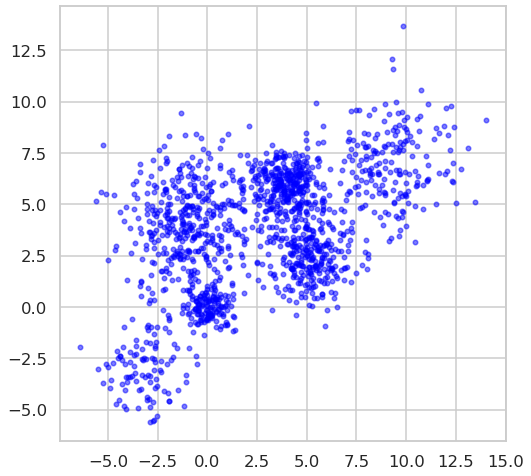

In [3]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")


n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)
Multi_blob_Data.shape

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

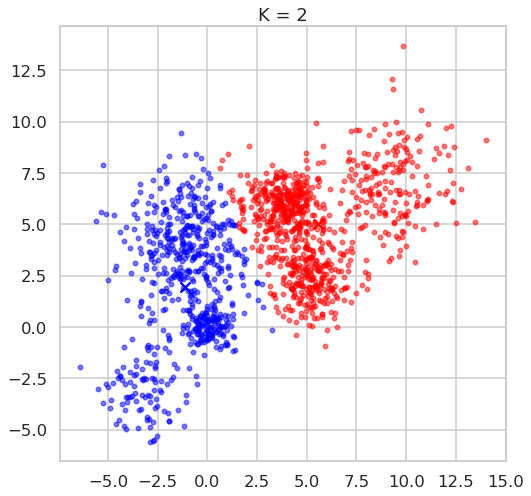

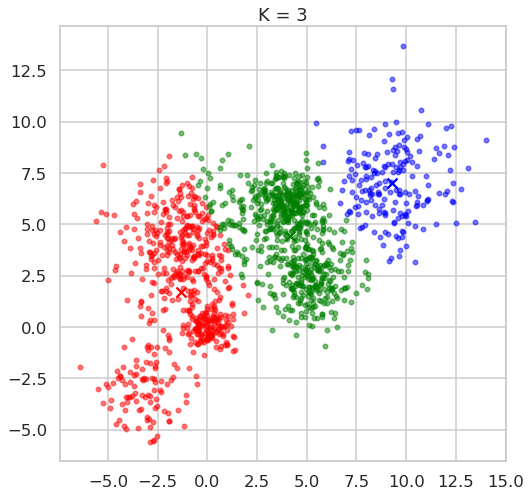

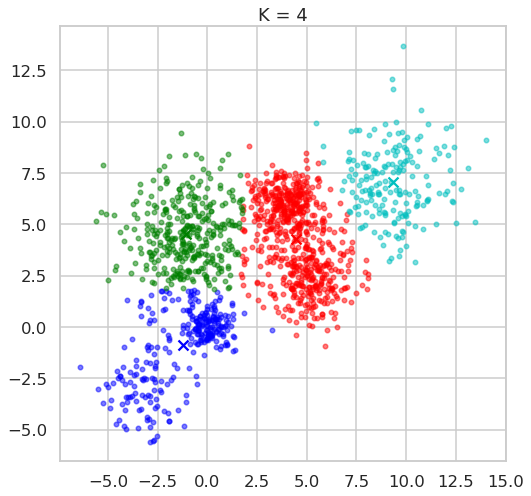

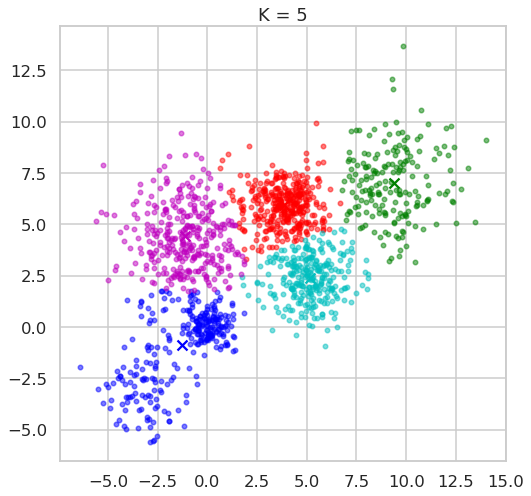

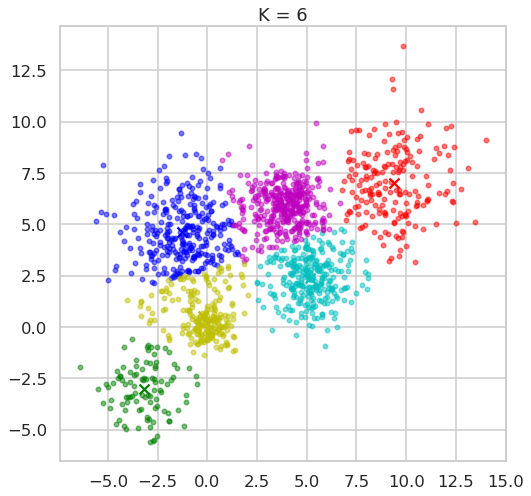

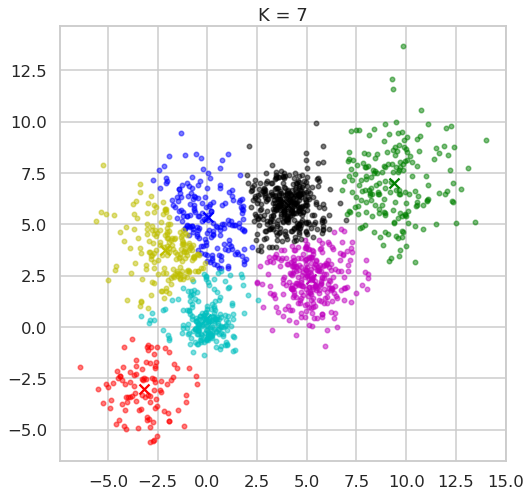

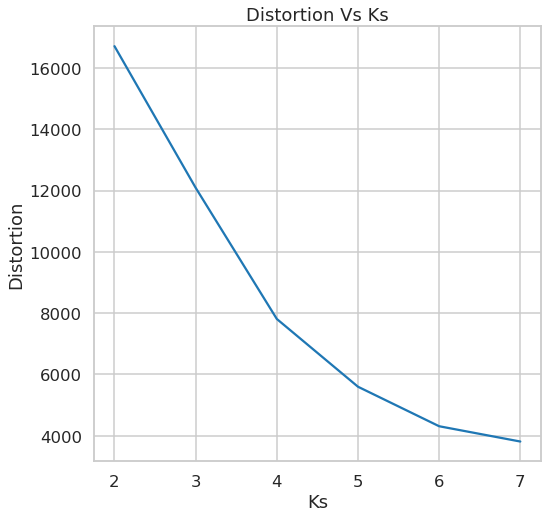

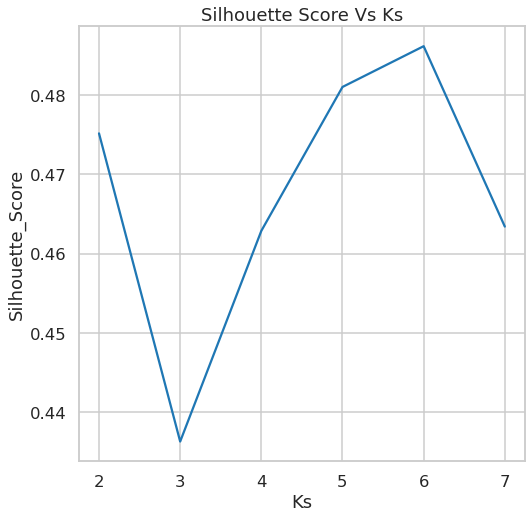

The best K value is 6
The Scores values [0.48614459735646176]


In [5]:
ks = [2,3,4,5,6,7]
distortion = []
S_score = []
all_scores = []
for i in ks:
    kmeans = KMeans(n_clusters=i).fit(Multi_blob_Data)
    display_cluster(Multi_blob_Data,kmeans,i)
    plt.show()
    distortion.append(kmeans.inertia_)
    score = silhouette_score(Multi_blob_Data,kmeans.labels_)
    S_score.append(score)
   
   
index_of_highest_score = np.array(S_score).argmax()   
best_k_kmeans = ks[index_of_highest_score]
best_s_score_kmeans = S_score[index_of_highest_score] 
all_scores.append(best_s_score_kmeans)

plt.xlabel("Ks")
plt.ylabel("Distortion")
plt.title("Distortion Vs Ks")
plt.plot(ks,distortion)  
plt.show()

plt.xlabel("Ks")
plt.ylabel("Silhouette_Score")
plt.title("Silhouette Score Vs Ks")
plt.plot(ks,S_score)  
plt.show()

print(f"The best K value is {best_k_kmeans}")
print(f"The Scores values {all_scores}")

  

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

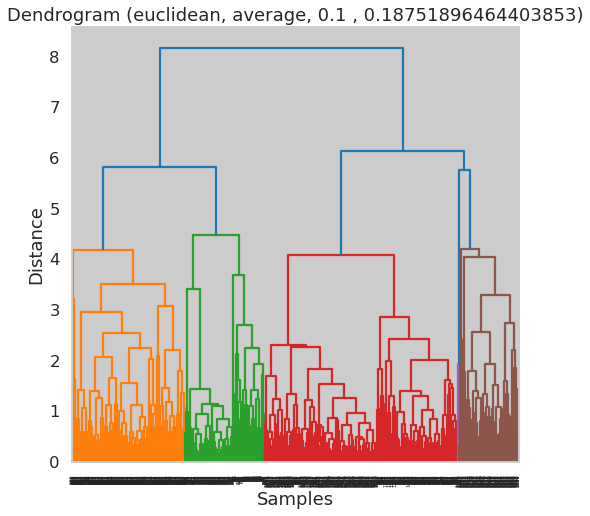

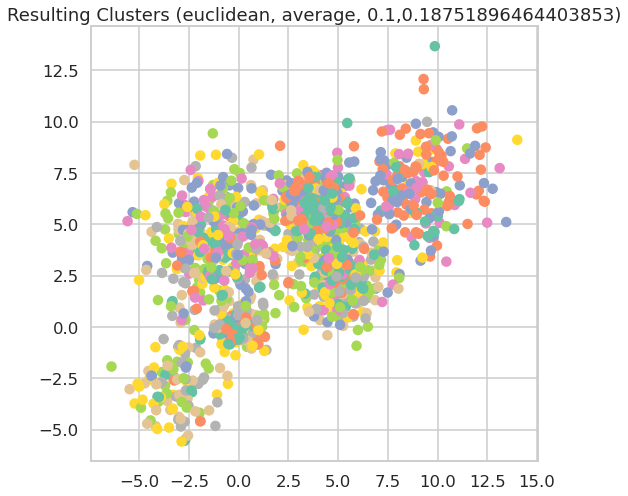

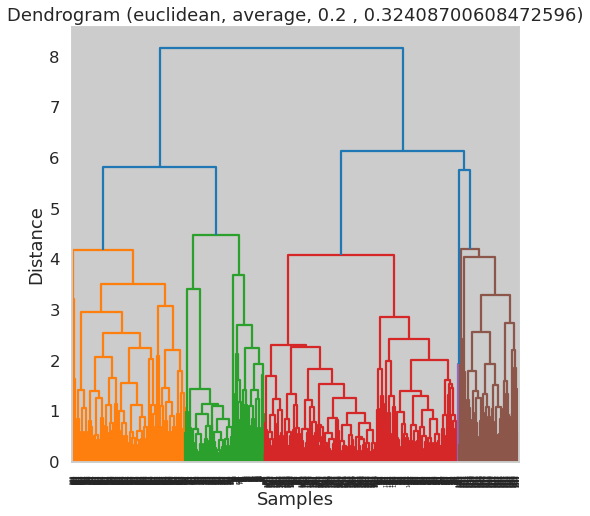

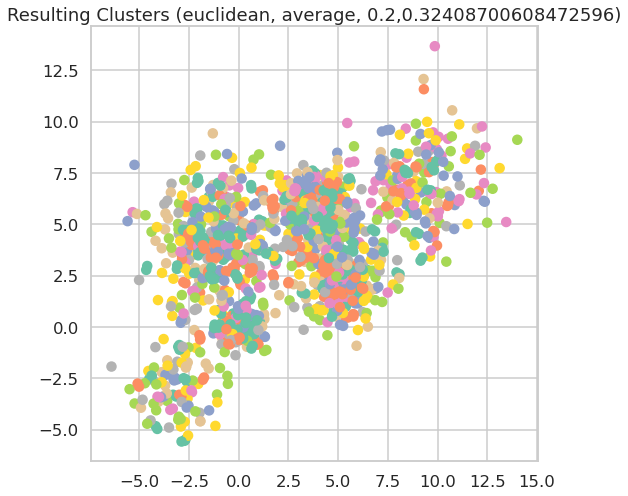

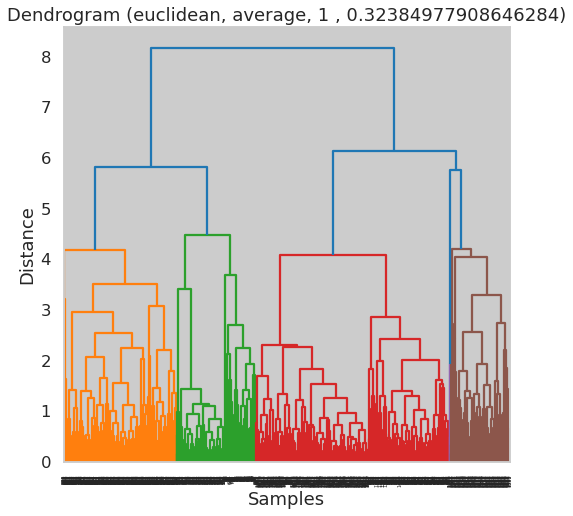

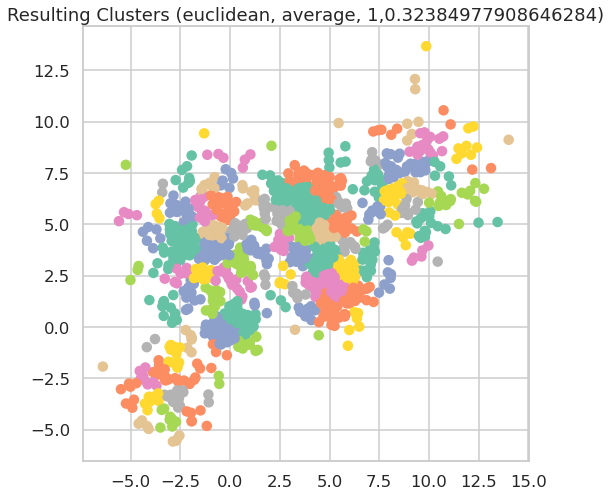

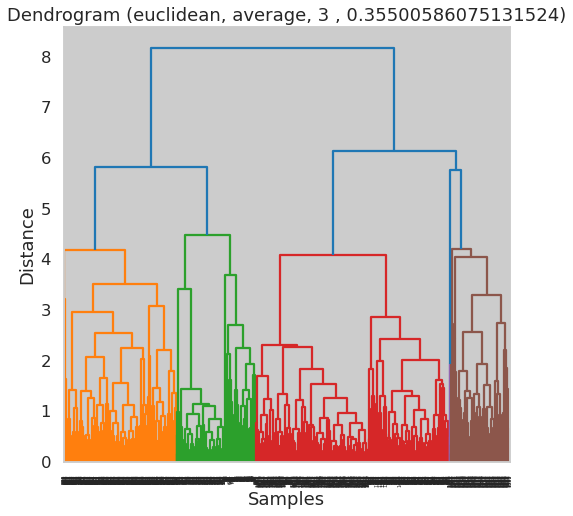

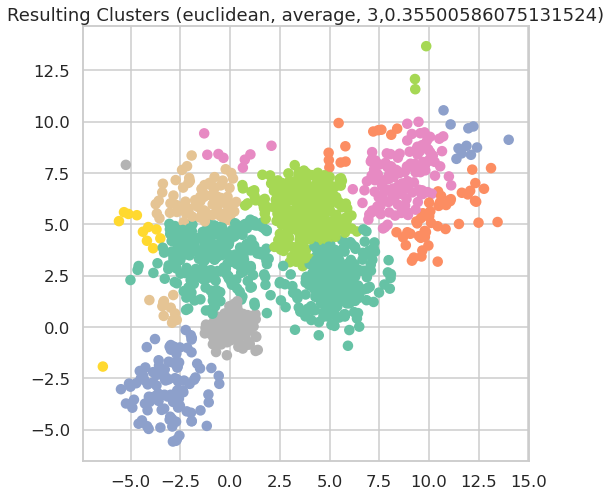

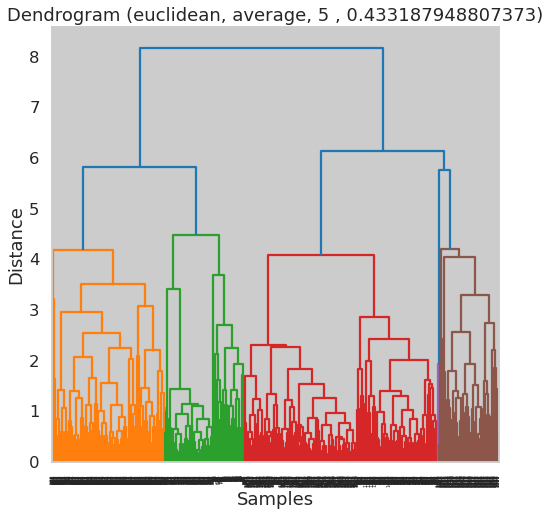

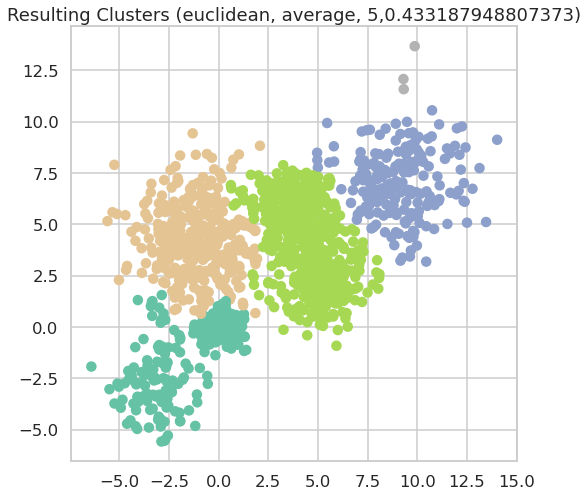

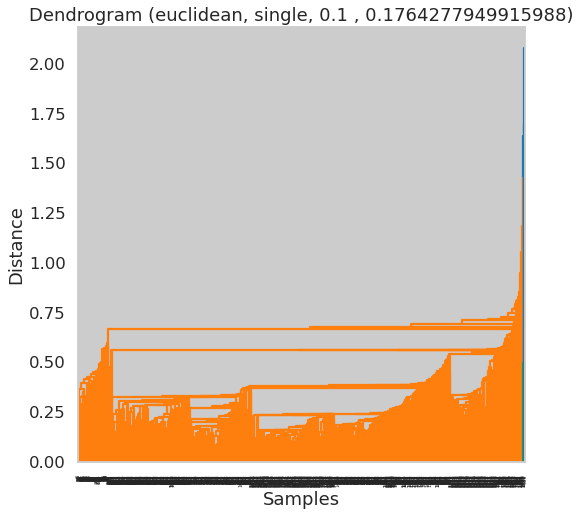

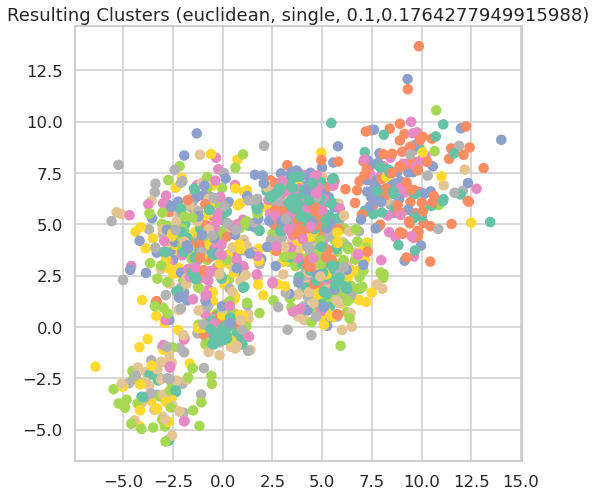

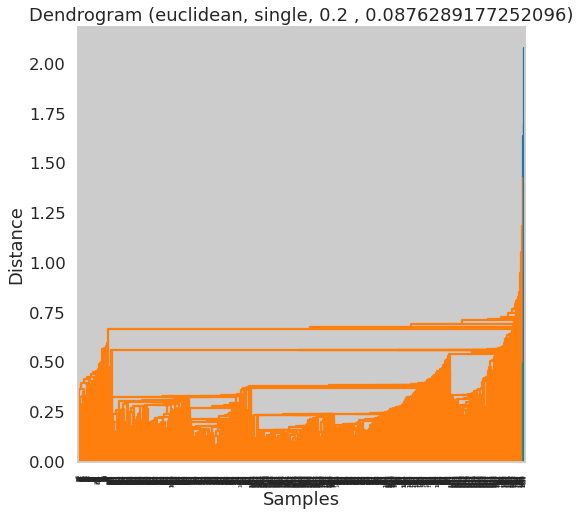

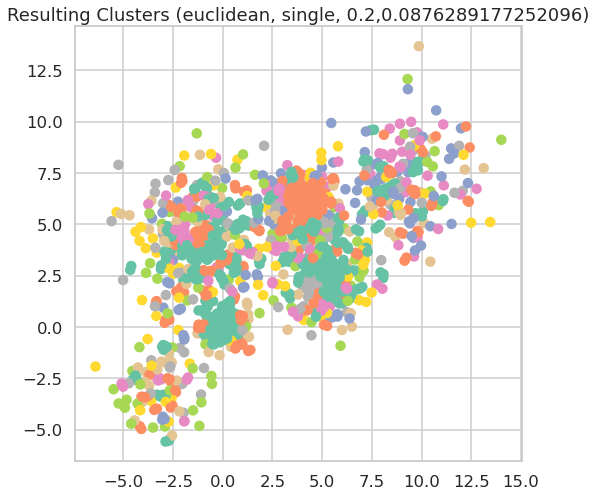

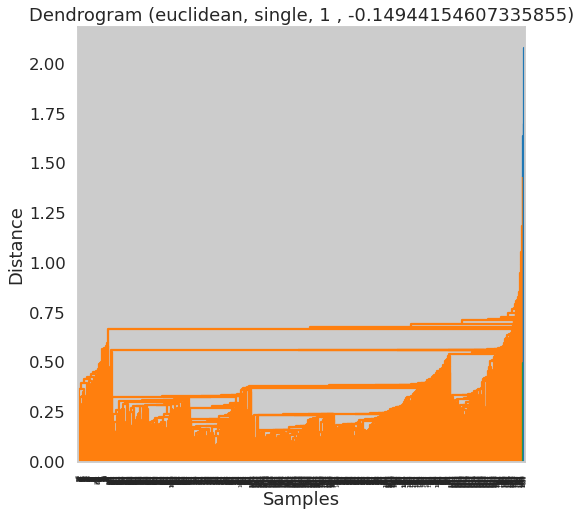

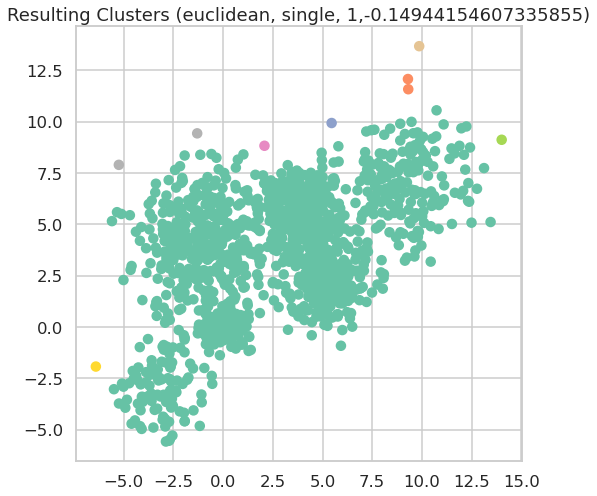

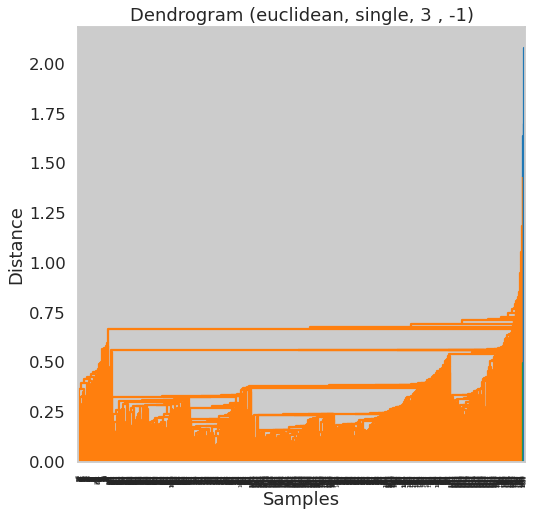

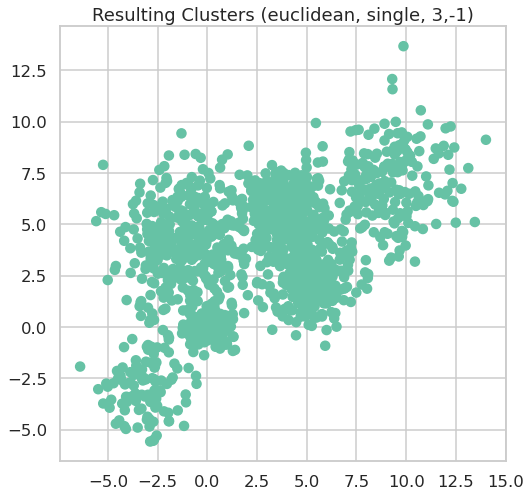

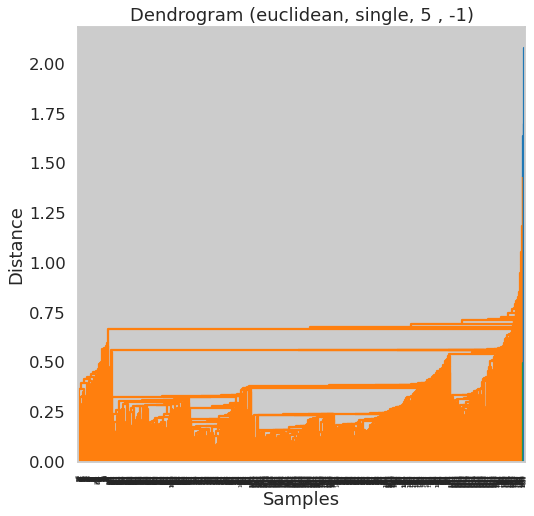

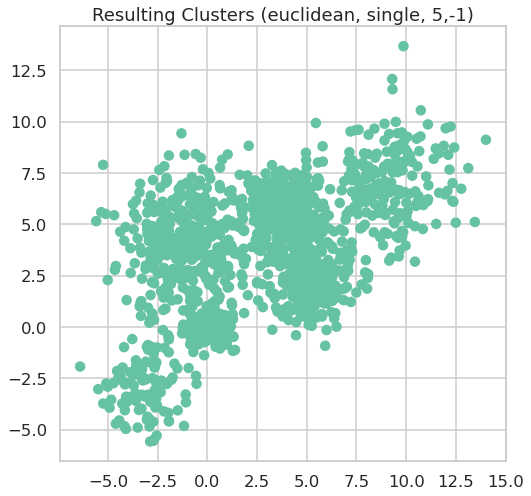

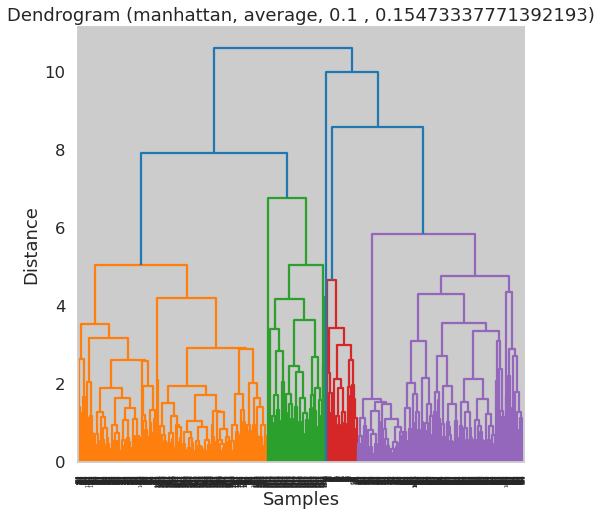

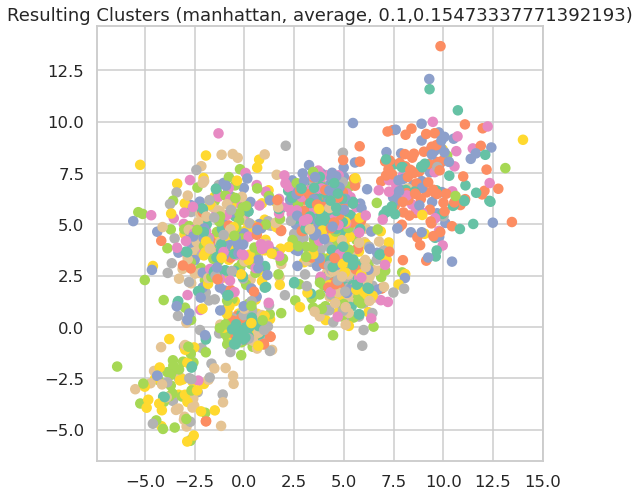

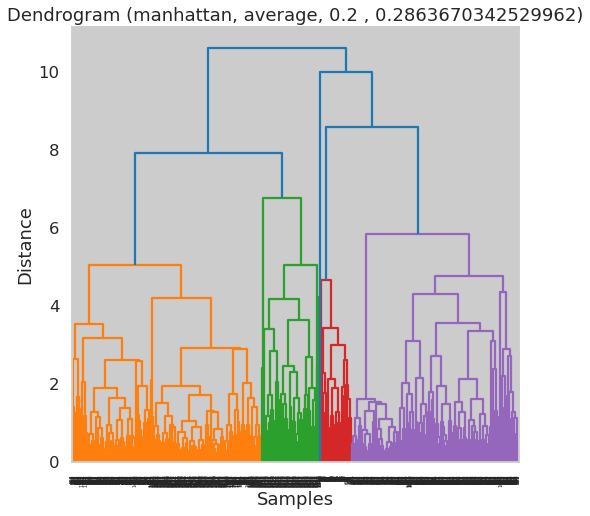

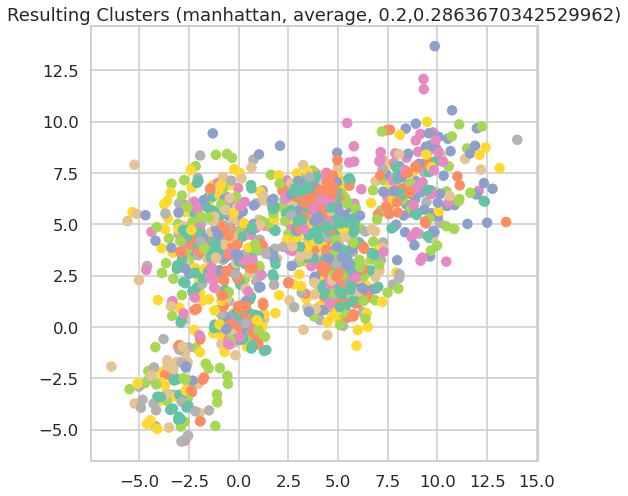

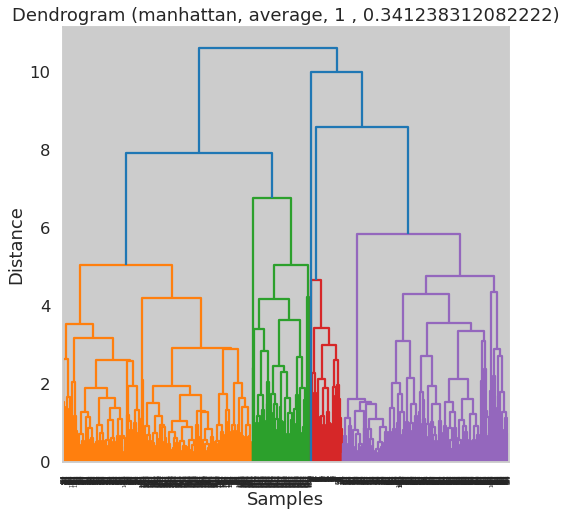

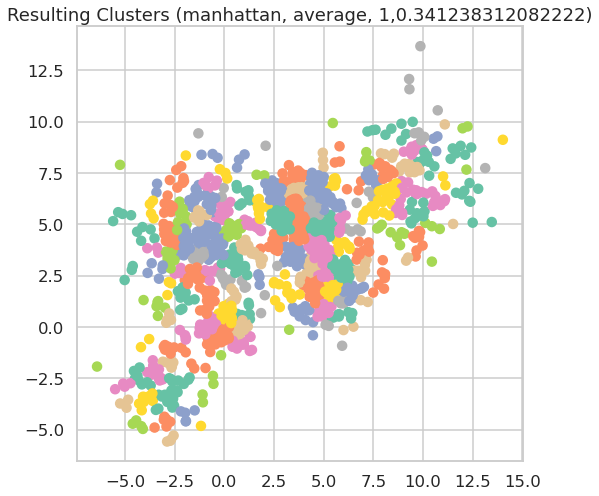

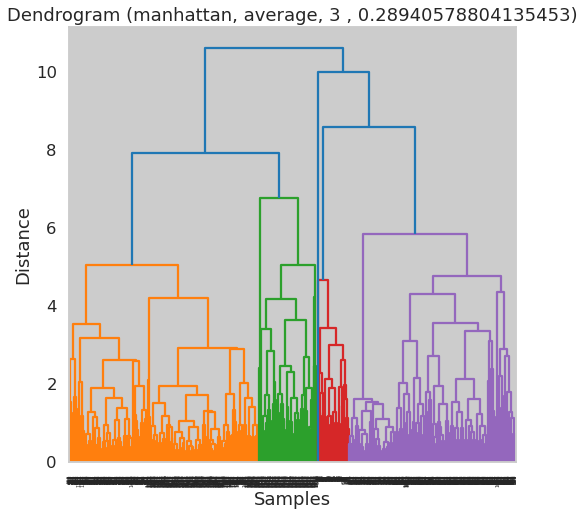

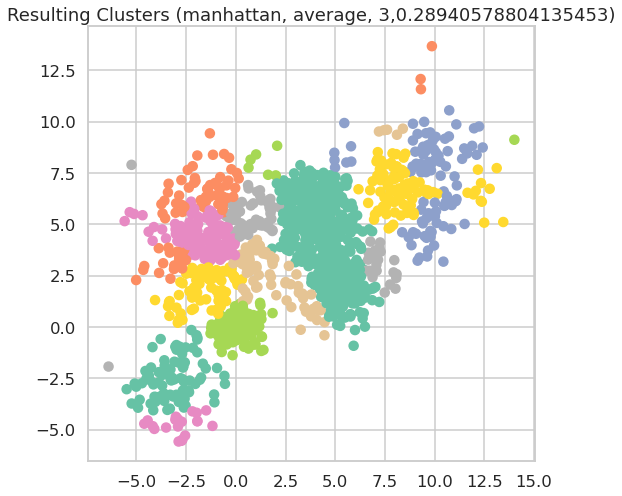

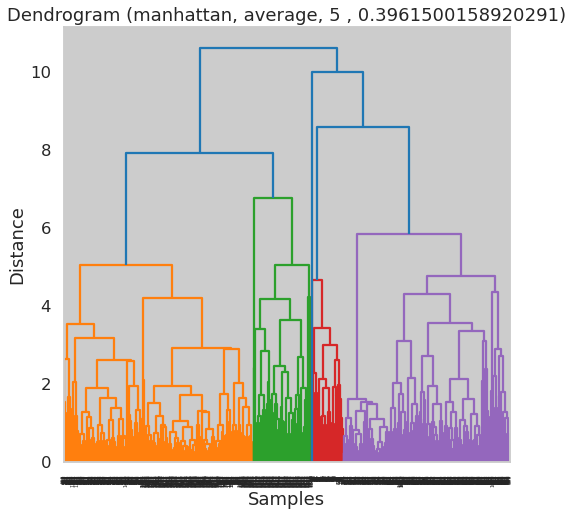

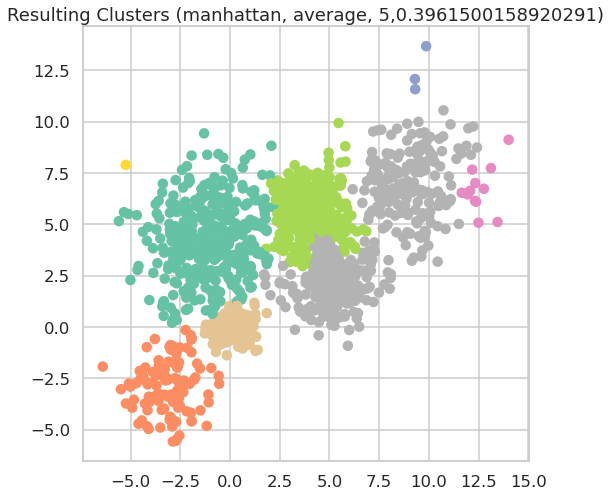

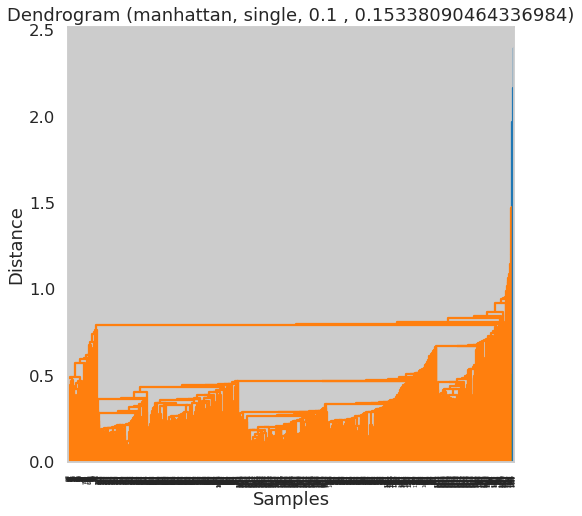

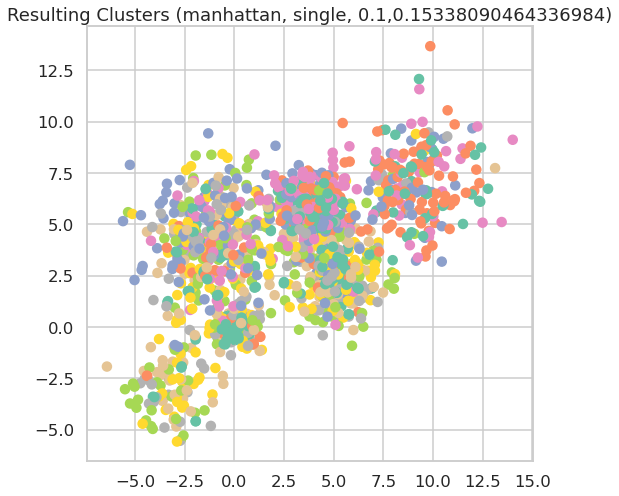

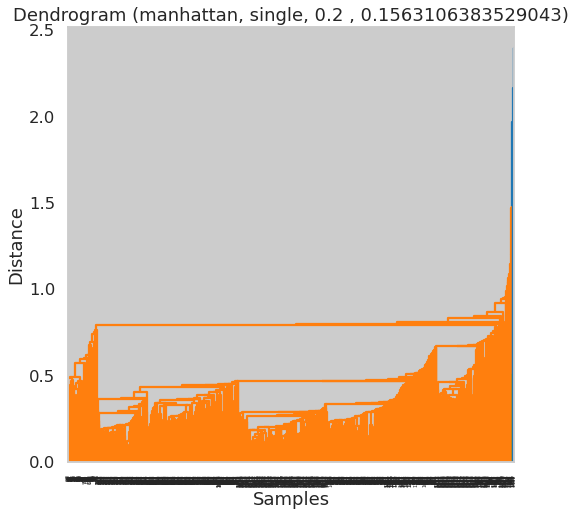

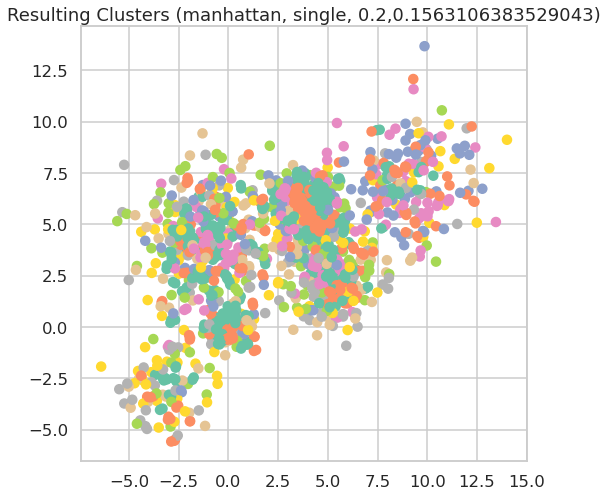

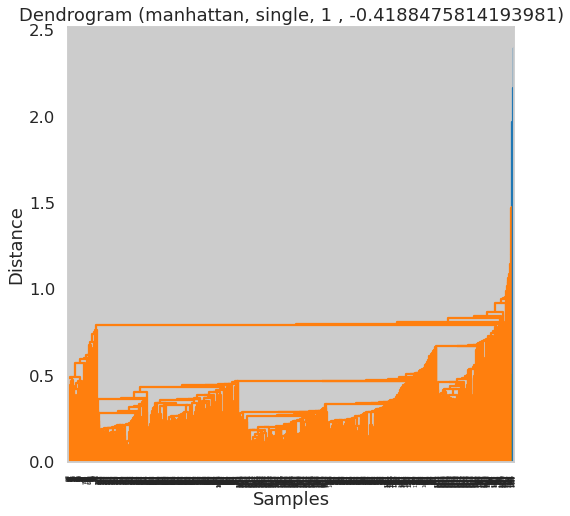

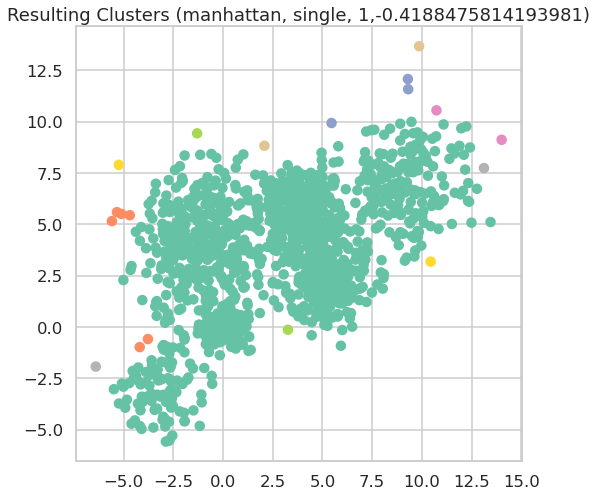

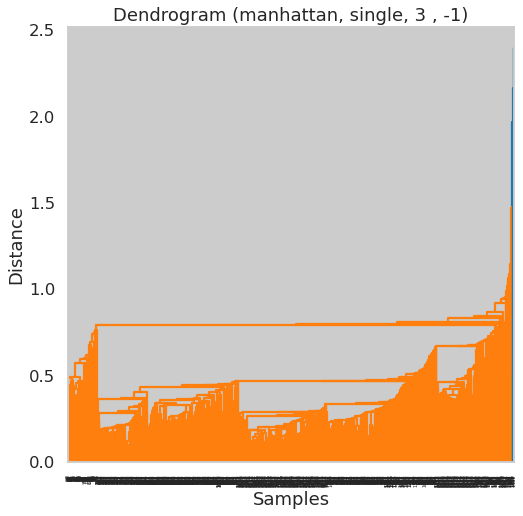

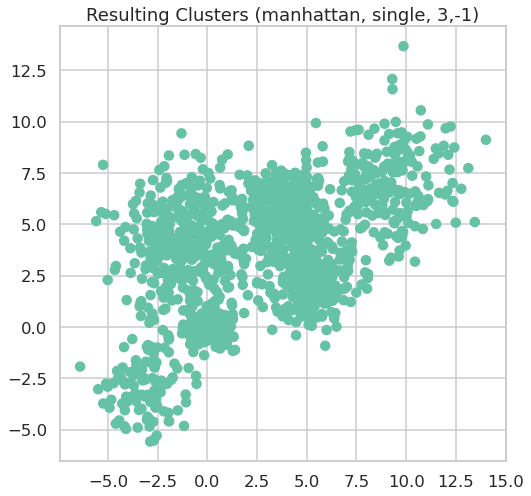

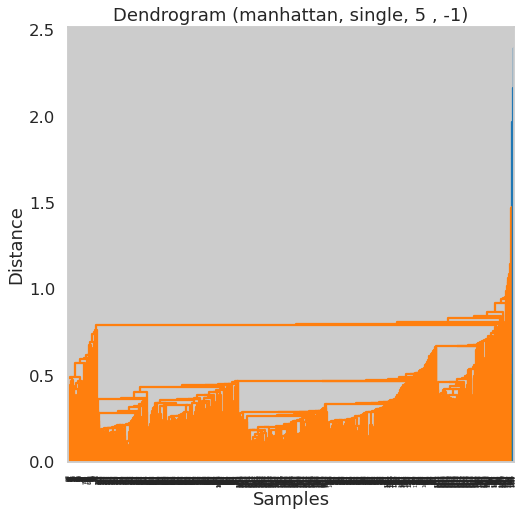

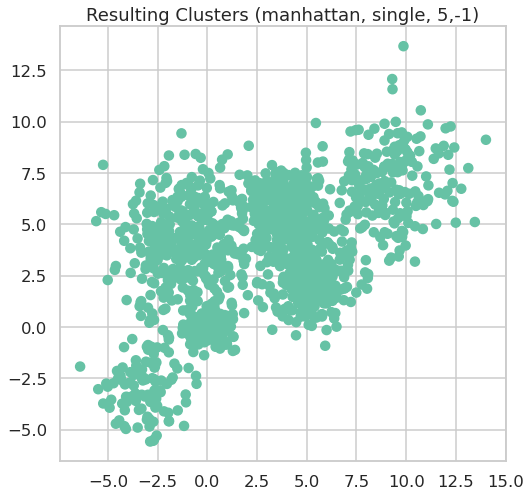

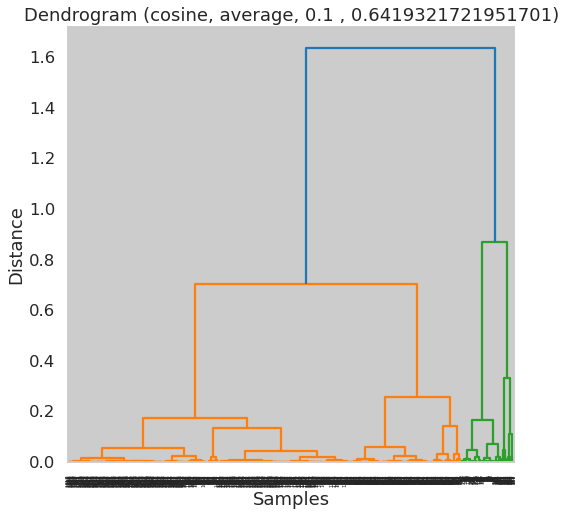

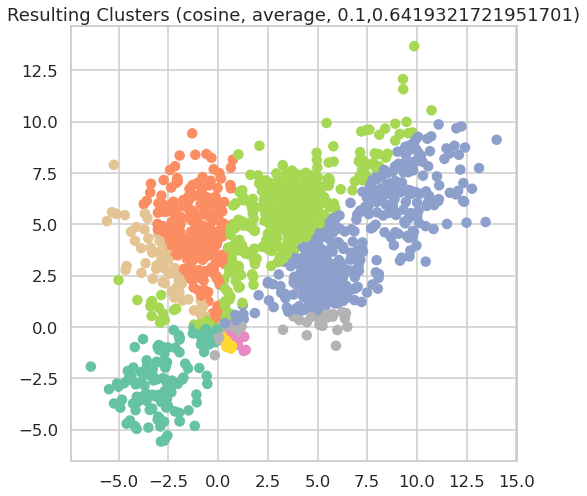

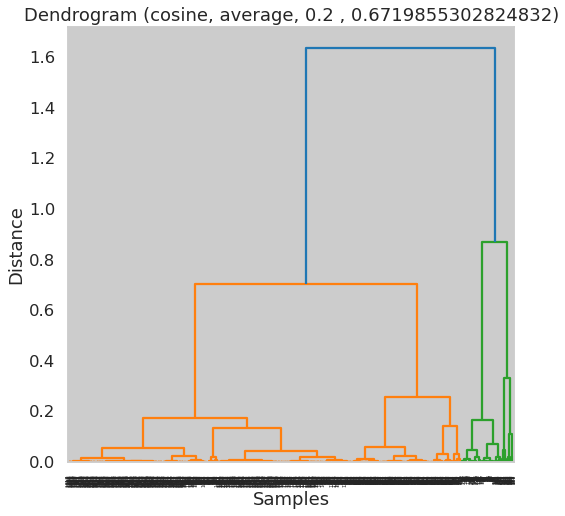

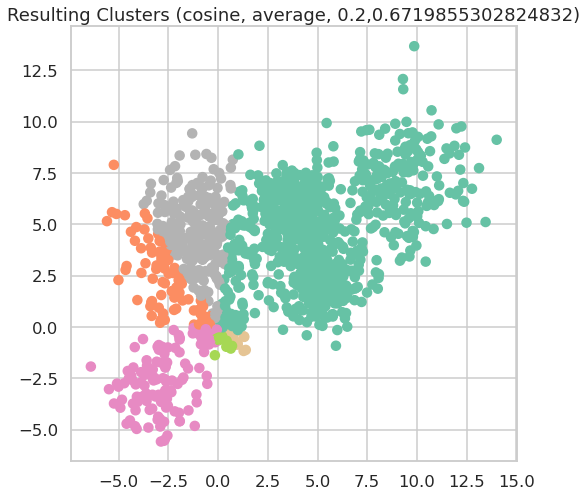

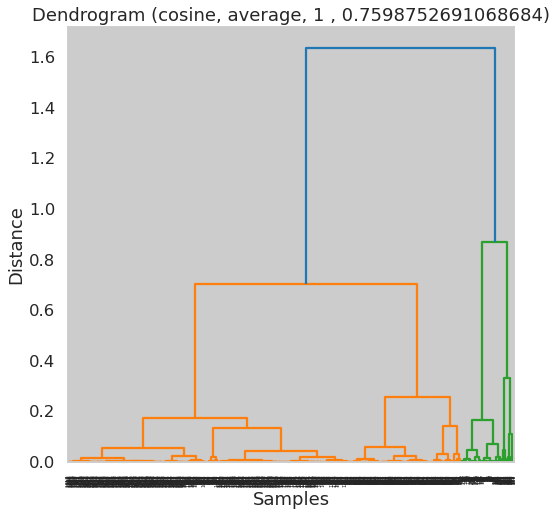

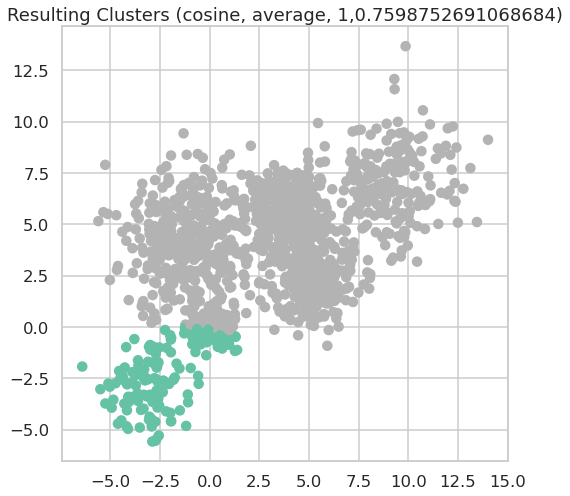

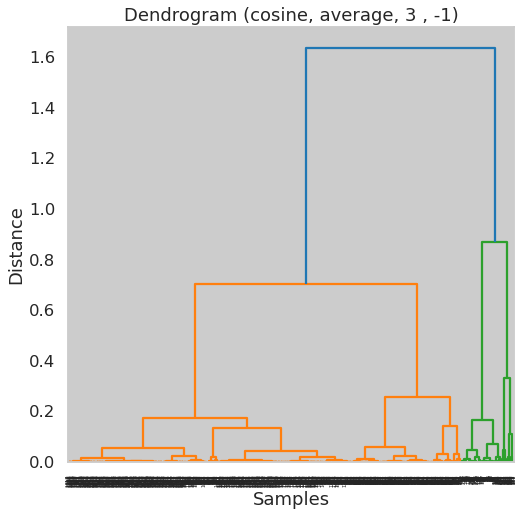

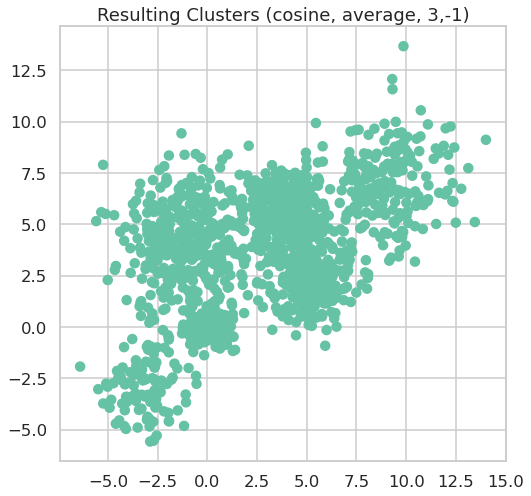

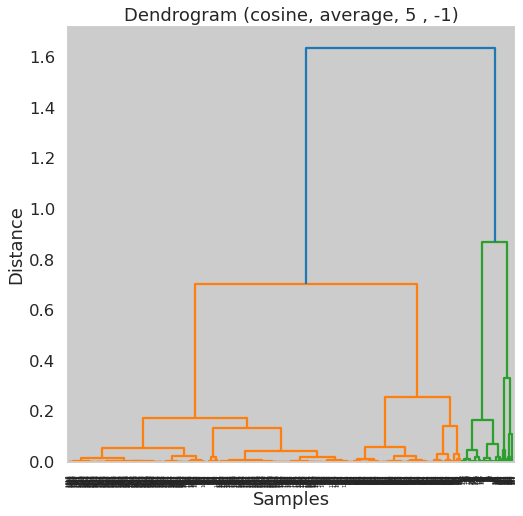

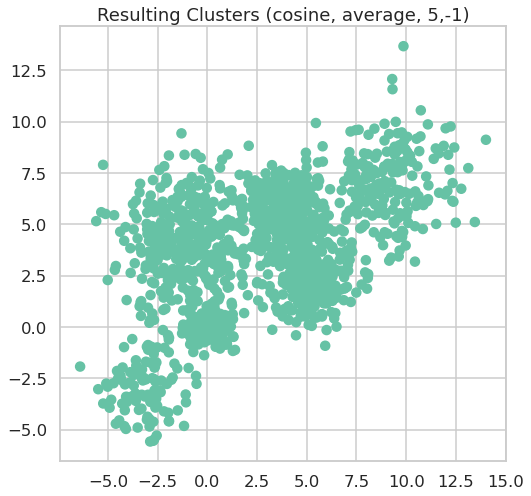

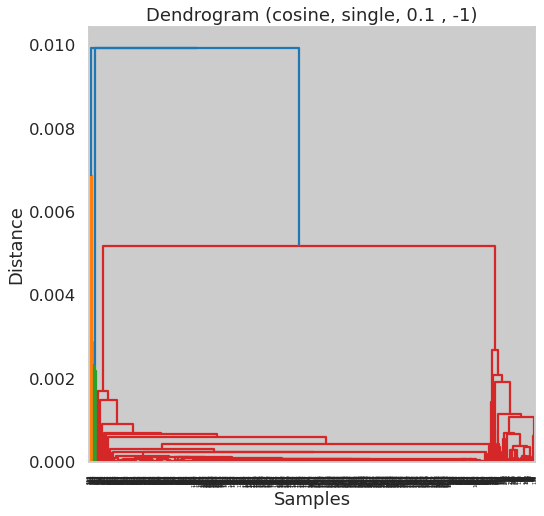

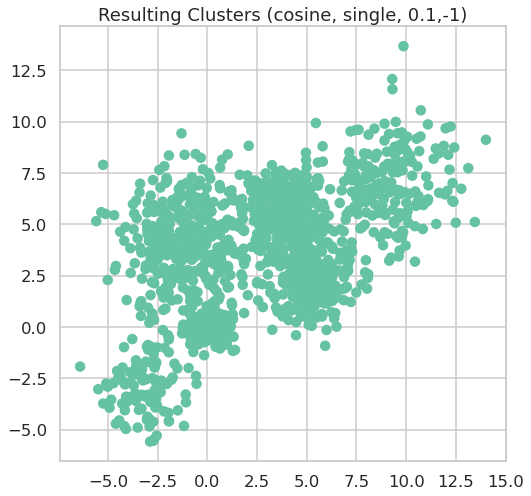

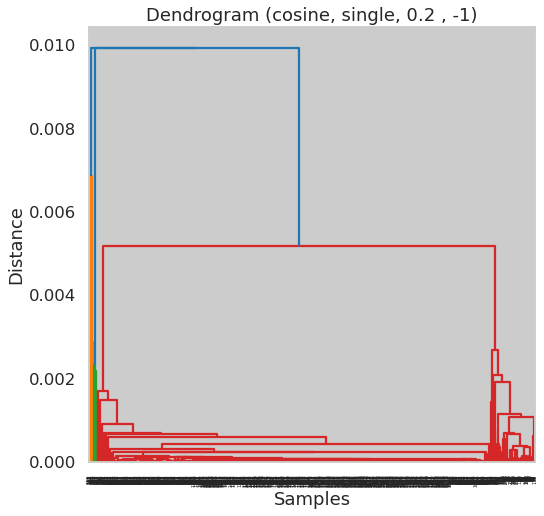

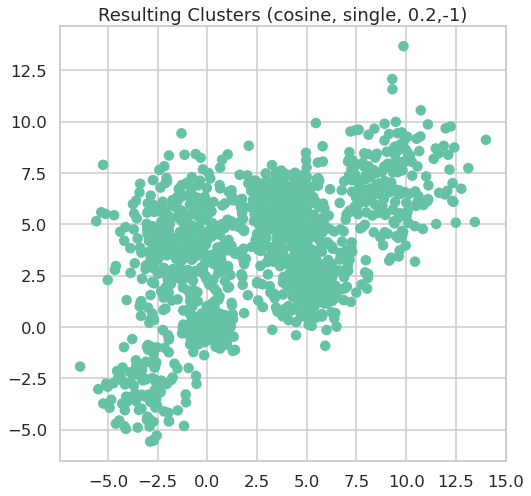

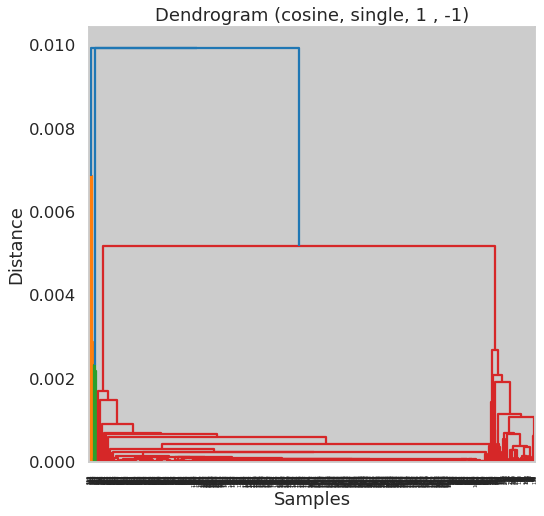

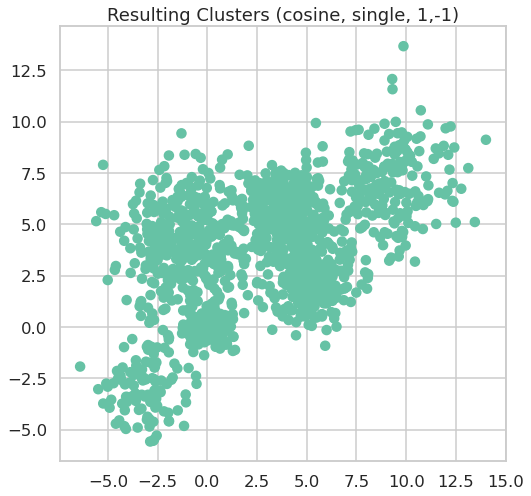

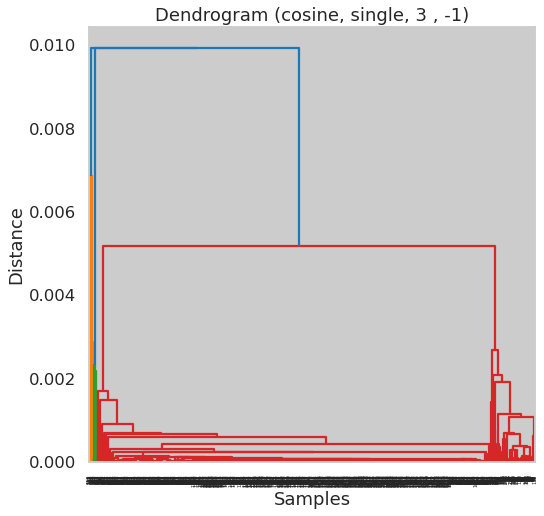

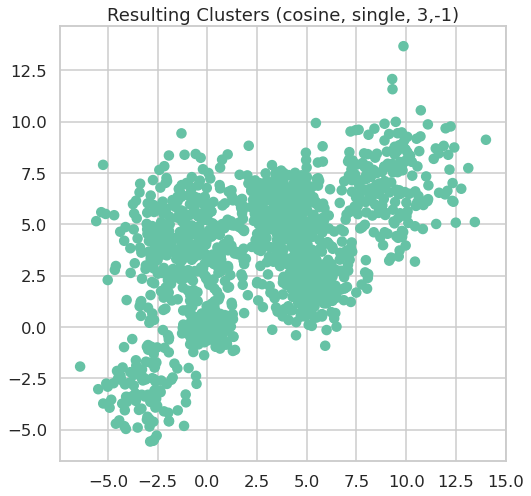

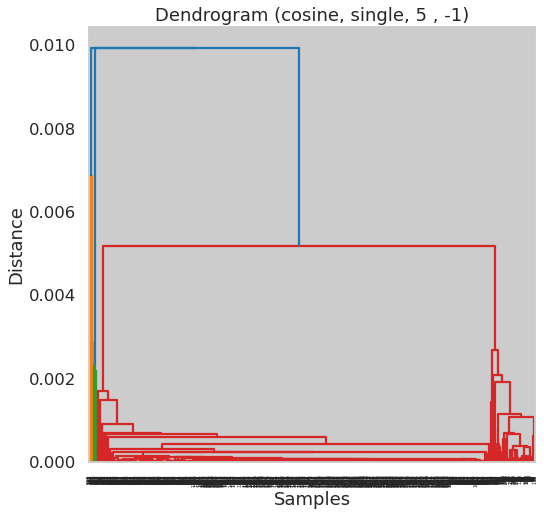

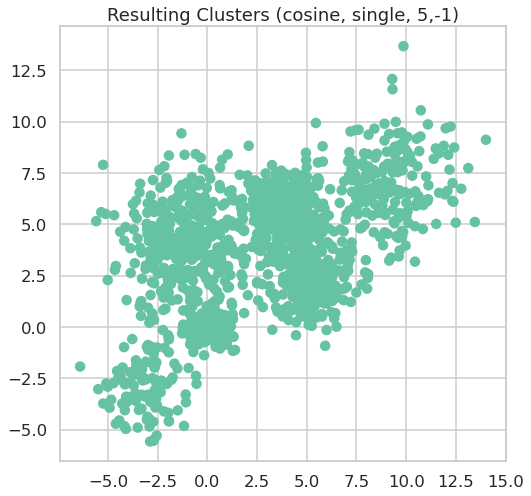

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

affinity = ["euclidean", "manhattan", "cosine"]
linkage = ["average", "single"]
distances = [0.1,0.2, 1, 3,5]

silhouette_scores = []
max_score = 0
best_affinity = ''
best_linkage = ''
best_threshold = ''
best_s_score_heirarical = 0

for i in range(len(affinity)):
    affnty = affinity[i]
    for j in range(len(linkage)):
        lnkage = linkage[j]

        for dist in distances:

            cluster_model = AgglomerativeClustering(n_clusters=None, affinity=affnty, linkage=lnkage, distance_threshold=dist).fit(Multi_blob_Data)
            labels = cluster_model.labels_
            plot_dendrogram(cluster_model)
            
            if(len(np.unique(cluster_model.labels_)) > 1):
                score = silhouette_score(Multi_blob_Data, cluster_model.labels_,metric=affnty)
                silhouette_scores.append(score)
                if(score > max_score):
                    max_score = score
                    best_affinity = affnty
                    best_linkage = lnkage
                    best_threshold = dist
                    best_s_score_heirarical = max_score

            else:
                score = -1
                silhouette_scores.append(score)
            
                
            
            plt.title(f'Dendrogram ({affnty}, {lnkage}, {dist} , {score})')
            plt.xlabel('Samples')
            plt.ylabel('Distance')
            plt.show()
            
            plt.figure()
            plt.title(f'Resulting Clusters ({affnty}, {lnkage}, {dist},{score})')
            plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=cluster_model.labels_, cmap="Set2")
            plt.show()
 
           


In [7]:


print(f'best silhouette score for heirarical clustering is {best_s_score_heirarical}')



print(f'best affinity is {best_affinity}')

print(f'best linkage is {best_linkage}')

print(f'best distance threshold is {best_threshold}')

all_scores.append(best_s_score_heirarical)

print(f'all scores so far {all_scores}')

best silhouette score for heirarical clustering is 0.7598752691068684
best affinity is cosine
best linkage is average
best distance threshold is 1
all scores so far [0.48614459735646176, 0.7598752691068684]


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [8]:
eps_list = list((x/10 for x in range(1,30,1))  )
min_samples_list = list(range(5,26))
print(eps_list)
print(min_samples_list)
max_score = 0
silhouette_scores = np.zeros((len(eps_list), len(min_samples_list)))
i=0
j=0
for eps in eps_list:
    j=0
    for min_samples in min_samples_list:
        labels = DBSCAN(eps=eps,min_samples=min_samples).fit_predict(Multi_blob_Data)
        if(len(np.unique(labels)) > 1):
            score = silhouette_score(Multi_blob_Data, labels)
            if(score > max_score):
                max_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels
                
        else:
            score = -1
        silhouette_scores[i,j] = score
        j+=1
    i+=1      

# plt.imshow(silhouette_scores, cmap='viridis', origin='lower', extent=[min_samples_list[0], min_samples_list[-1], eps_list[0], eps_list[-1]], aspect='auto')
# plt.colorbar()
# plt.xlabel('Min_samples')
# plt.ylabel('EPS')
# plt.title('Silhouette Score')
# plt.show()




print(f'best minimum samples {best_min_samples}')
print(f'best eps {best_eps}')     
print(f'best silhouette score for DBSCAN {max_score}')  

 
              

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
best minimum samples 6
best eps 2.1
best silhouette score for DBSCAN 0.4685207355522043


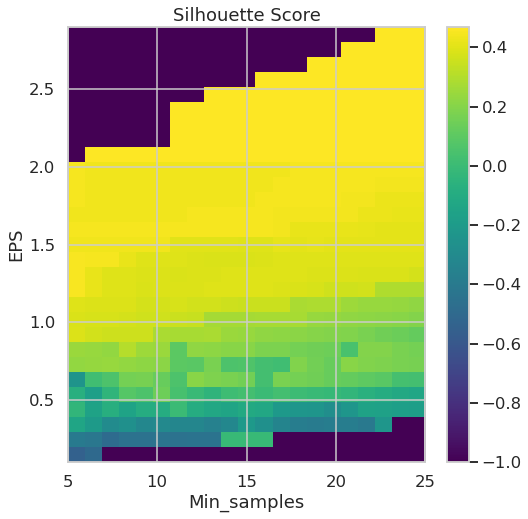

In [9]:

plt.imshow(silhouette_scores, cmap='viridis', origin='lower', extent=[min_samples_list[0], min_samples_list[-1], eps_list[0], eps_list[-1]], aspect='auto')
plt.colorbar()
plt.xlabel('Min_samples')
plt.ylabel('EPS')
plt.title('Silhouette Score')
plt.show()


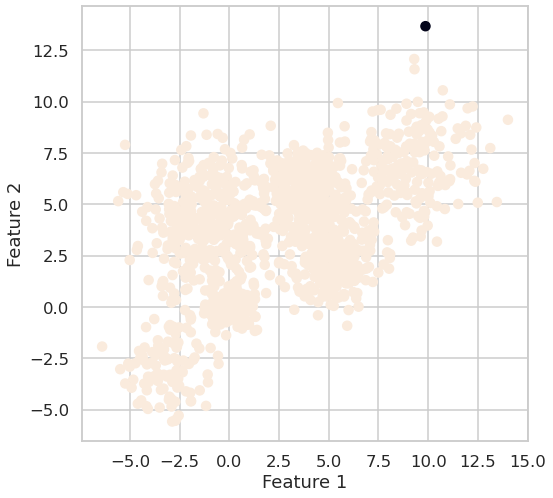

In [10]:
plt.scatter(Multi_blob_Data[:,0],Multi_blob_Data[:,1],c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [11]:
all_scores.append(max_score)
print(f'Silhoutte scores {all_scores}')

Silhoutte scores [0.48614459735646176, 0.7598752691068684, 0.4685207355522043]


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [12]:
from scipy.stats import multivariate_normal
import math
covariance_type_list = ['full', 'tied', 'diag', 'spherical']
max_score = -math.inf
s_score = 0
max_s_score = 0

for covariance_type in covariance_type_list:
    gmm_model = GaussianMixture(n_components=6,covariance_type=covariance_type).fit(Multi_blob_Data)
    labels = gmm_model.predict(Multi_blob_Data)
    score = gmm_model.score(Multi_blob_Data)
    print(score)
    if(score>max_score):
        max_score = score
        best_cov_type = covariance_type
        best_gmm = gmm_model
    s_score = silhouette_score(Multi_blob_Data, labels)    
    if(s_score > max_s_score):
       max_s_score = s_score 
    
print(f'best loglikelood score {max_score}')
print(f'best covariance type {best_cov_type}')    
print(f'best Silhouette score for gmm is {max_s_score}')
def plot_gmm(gmm, X):
    x, y = np.meshgrid(np.linspace(-10, 15), np.linspace(-10, 15))
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    fig, ax = plt.subplots(figsize=(8,8))
    ax.scatter(X[:, 0], X[:, 1], alpha=0.3)
    ax.set_xlim([-10, 15])
    ax.set_ylim([-10, 15])
    for i in range(gmm.n_components):
        covariances = gmm.covariances_
        if gmm.covariance_type == 'spherical':
            covariances = np.eye(2) * covariances[i]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            covariances = np.eye(2) * covariances[i]
        else:
            covariances = covariances[i]
        rv = multivariate_normal(mean=gmm.means_[i], cov=covariances)
        ax.contour(x, y, rv.pdf(pos), colors='black', alpha=0.8)
    plt.title(f"Gaussian Mixture Model ({gmm.covariance_type} covariance)")
    plt.show()
    
# plot_gmm(best_gmm,Multi_blob_Data)    

-4.768562877406321
-4.94673388900045
-4.7701413447470165
-4.773298735150076
best loglikelood score -4.768562877406321
best covariance type full
best Silhouette score for gmm is 0.4555797970155607


(1450, 2)


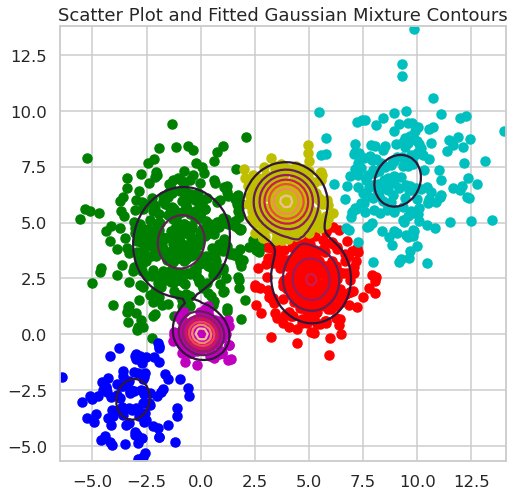

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
print(Multi_blob_Data.shape)

#labels of the predicted data
y_labels = best_gmm.predict(Multi_blob_Data)


# Create a grid of points to evaluate the PDF on
x_min, x_max = Multi_blob_Data[:, 0].min() - 0.1, Multi_blob_Data[:, 0].max() + 0.1
y_min, y_max = Multi_blob_Data[:, 1].min() - 0.1, Multi_blob_Data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Evaluate PDF at grid points
pdf = best_gmm.score_samples(grid)
pdf = np.exp(pdf)
pdf = pdf.reshape(xx.shape)

# Plot scatter plot and fitted Gaussian Mixture contours
fig, ax = plt.subplots()
#ax.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=['r']*450+['b']*1000)
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i in range(n_bins):
    ax.scatter(Multi_blob_Data[y_labels==i, 0], Multi_blob_Data[y_labels==i, 1], c=colors[i], label=f'Model {i}')
    
ax.contour(xx, yy, pdf)
ax.set_title('Scatter Plot and Fitted Gaussian Mixture Contours')

plt.show()

In [14]:
all_scores.append(max_s_score)

In [15]:
print(f'all scores so far {all_scores}')

all scores so far [0.48614459735646176, 0.7598752691068684, 0.4685207355522043, 0.4555797970155607]


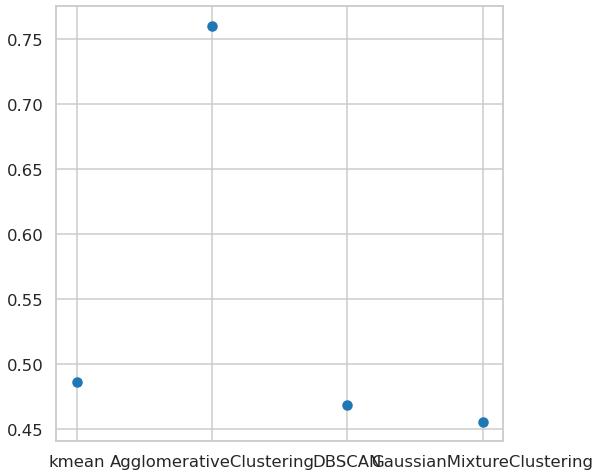

In [19]:
algs = ['kmean','AgglomerativeClustering','DBSCAN','GaussianMixtureClustering']

plt.scatter(algs,all_scores)



## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [101]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']

def plot_clusters(data,labels,title):
    plt.scatter(data[:,0],data[:,1],c=labels,cmap='Set1')
    plt.title(title)
    plt.show


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

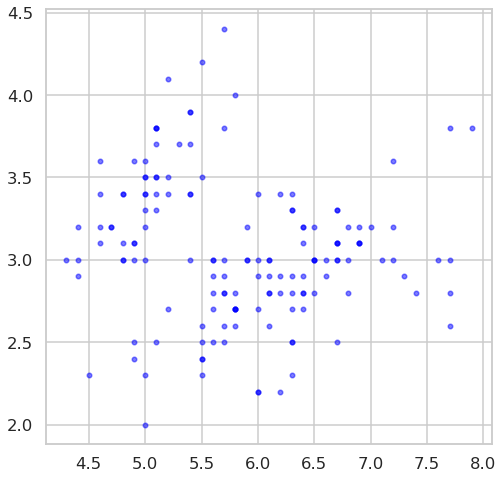

In [94]:
data = iris_data.data
display_cluster(data)

Text(0.5, 1.0, 'Kmeans with k=3 and silhouette score = 0.5528190123564095')

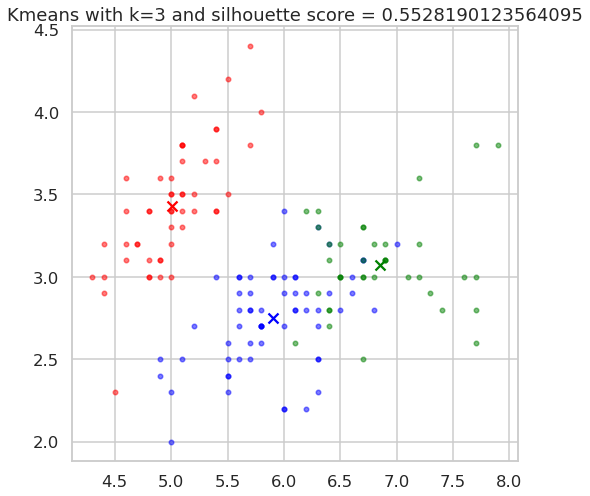

In [95]:

kmean_model = KMeans(n_clusters=3).fit(data)
display_cluster(data,model,num_clusters=3)
silhouette_score_kmeans_iris = silhouette_score(X=data,labels=kmean_model.labels_)
plt.title(f"Kmeans with k={3} and silhouette score = {silhouette_score_kmeans}")


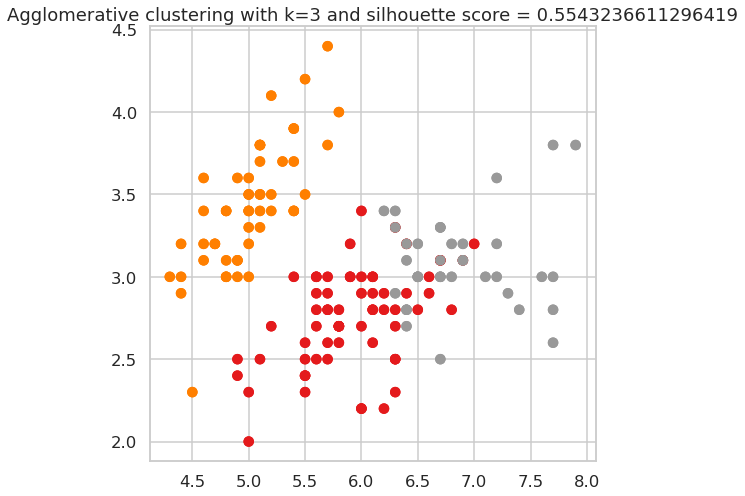

In [102]:
agg_clustering_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(data)

plt.scatter(data[:,0],data[:,1],c=agg_clustering_model.labels_,cmap='Set1')
silhouette_score_agg_iris = silhouette_score(X=data,labels=agg_clustering_model.labels_)

title = f"Agglomerative clustering with k={3} and silhouette score = {silhouette_score_agg_iris}"
plot_clusters(data,agg_clustering_model.labels_,title)

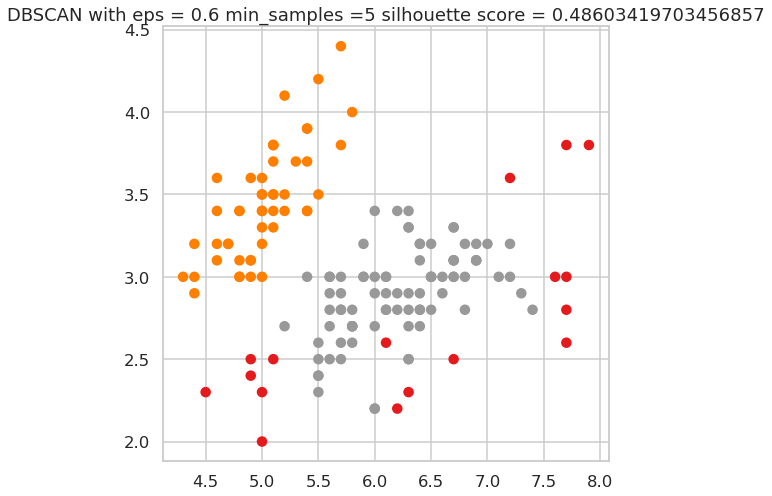

In [87]:
dbscan_model = DBSCAN(eps=0.5,min_samples=5).fit(data)
silhouette_score_DBSCAN_iris = silhouette_score(X=data,labels=dbscan_model.labels_)
title = f"DBSCAN with eps = {0.6} min_samples ={5} silhouette score = {silhouette_score_DBSCAN_iris}"
plot_clusters(data,dbscan_model.labels_,title)

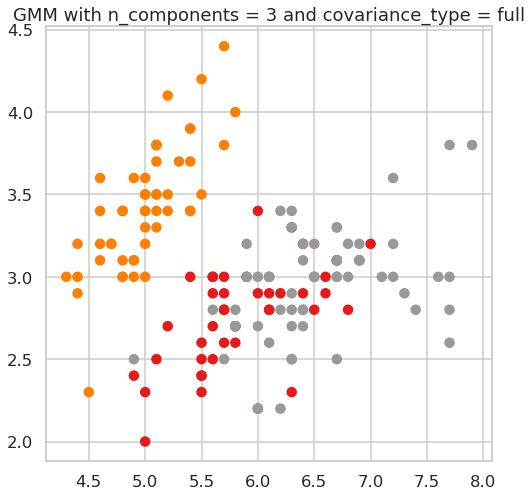

In [90]:
gmm_model = GaussianMixture(n_components=3, covariance_type='full').fit(data)
labels = gmm_model.predict(data)
loglikeloodscore = gmm_model.score(data)
title = f"GMM with n_components = 3 and covariance_type = full"
plot_clusters(data,labels,title)

## Customer dataset
Repeat all the above on the customer data set 

In [19]:
customer_df = pd.read_csv("/mnt/F432E65F32E625F8/my faculty/10th semester/Machine Learning/Projects/customerData.csv")

customer_df = customer_df.drop("ID",axis=1)
customer_df

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0       0               0   67          2  124670           1                2
1       1               1   22          1  150773           1                2
2       0               0   49          1   89210           0                0
3       0               0   45          1  171565           1                1
4       0               0   53          1  149031           1                1
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0   47          1  123525           0                0
1996    1               1   27          1  117744           1                0
1997    0               0   31          0   86400           0                0
1998    1               1   24          1   97968           0                0
1999    0               0   25          0   68416           0                0

[2000 rows x 7 columns]

In [52]:
customer_data = np.array(customer_df)
len(customer_data)-1

1999

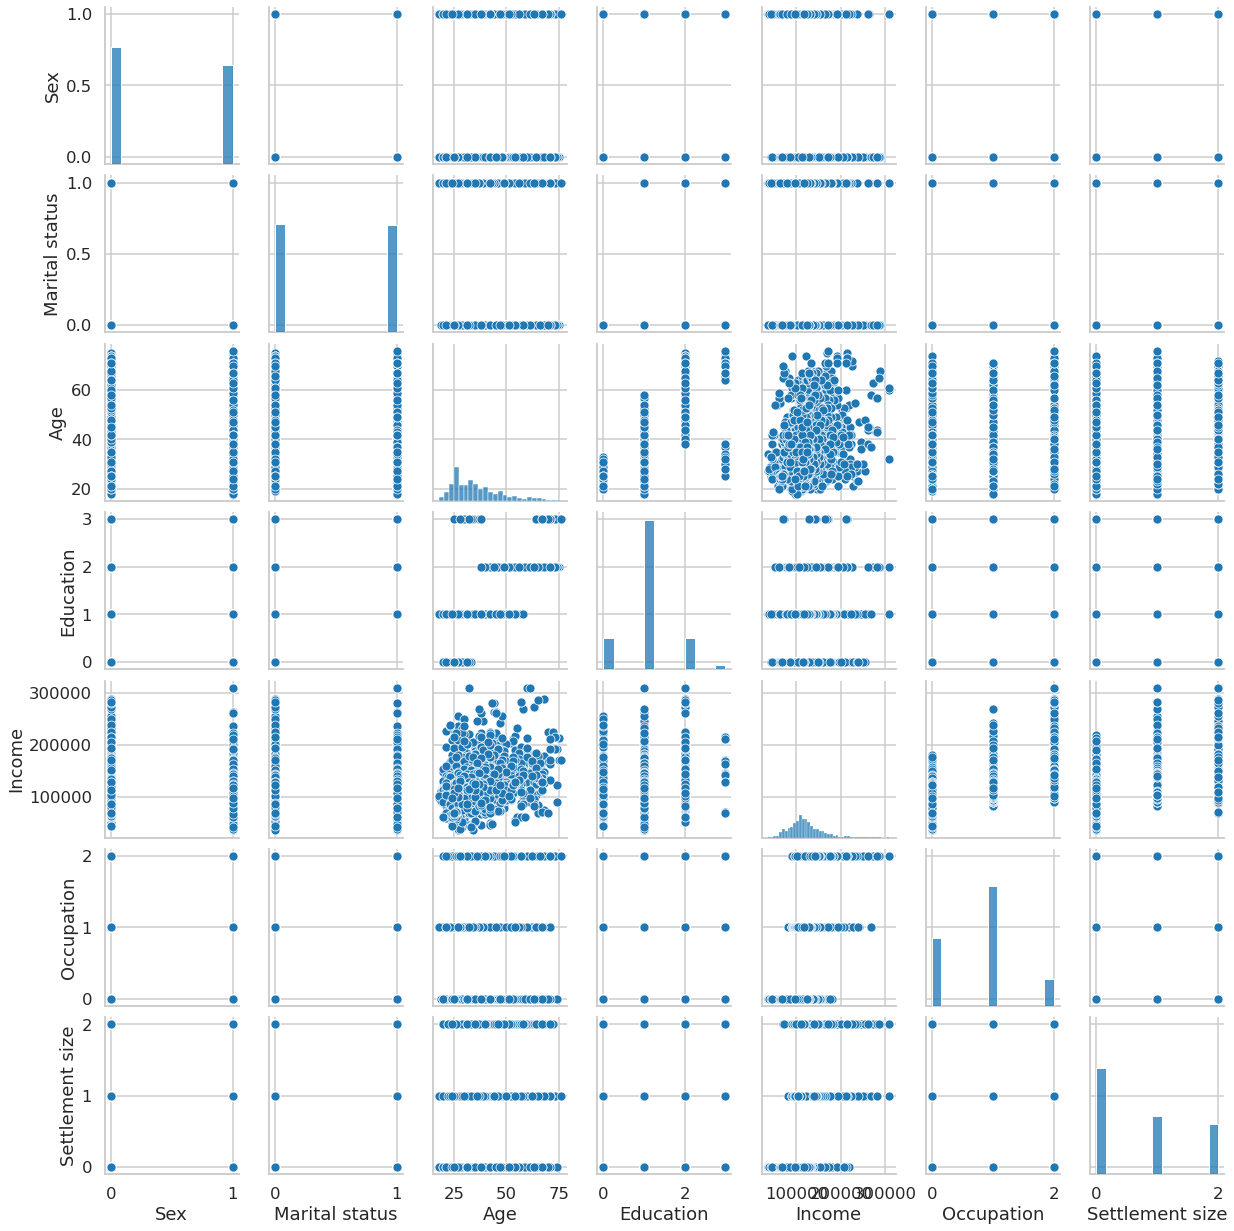

In [32]:
sns.pairplot(customer_df)

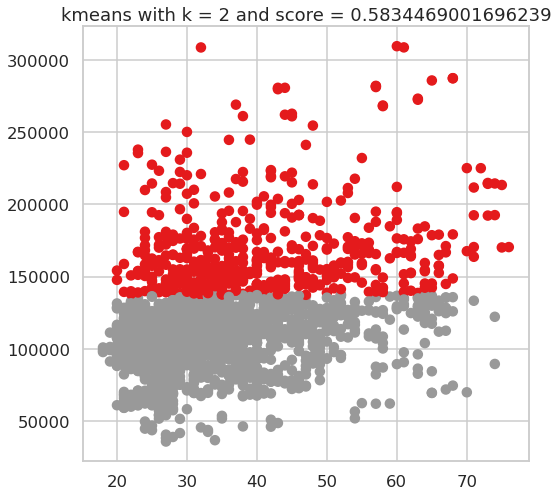

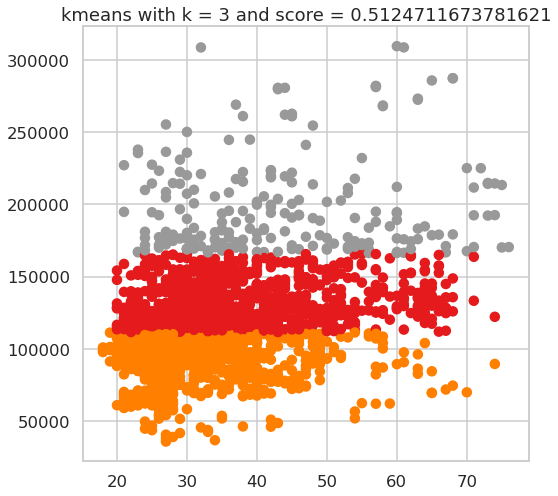

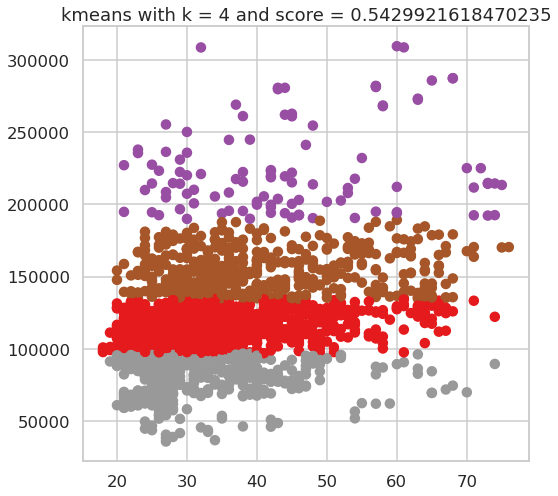

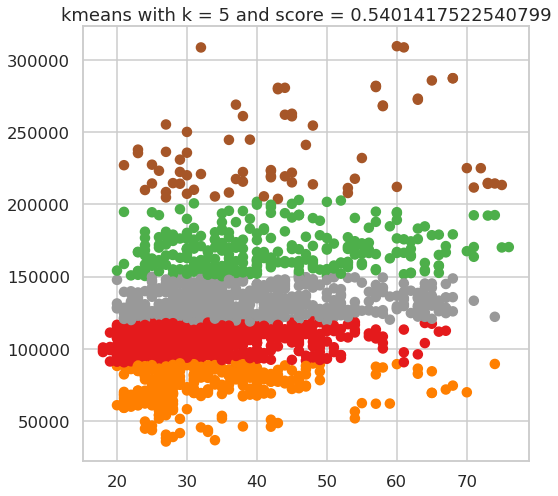

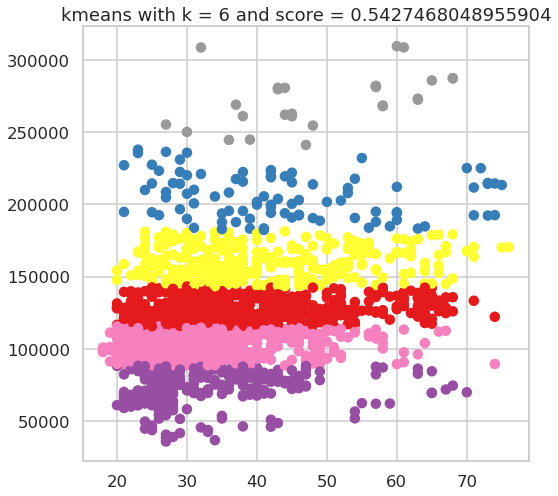

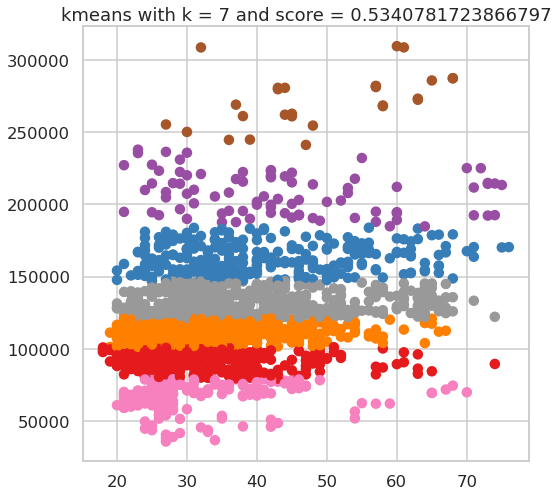

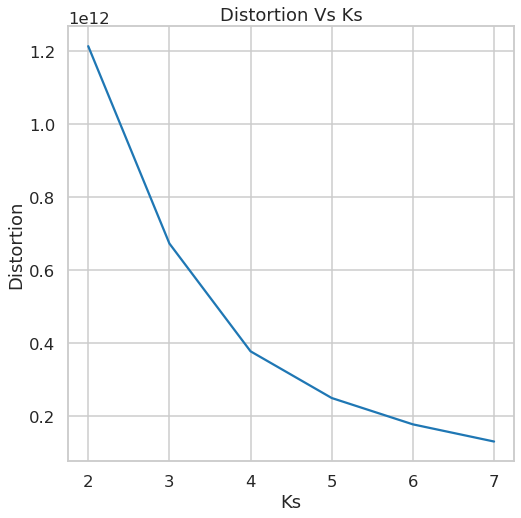

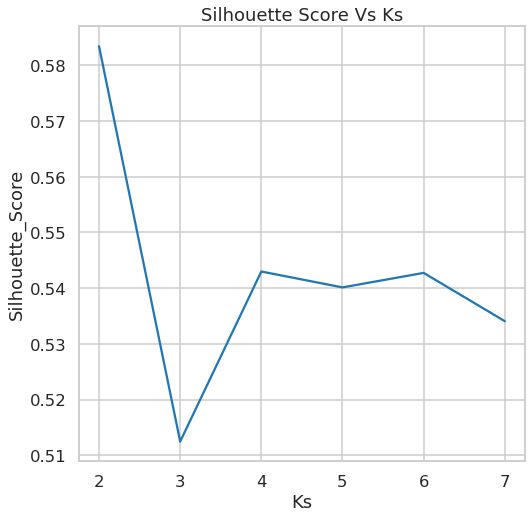

The best K value is 2


In [43]:
#clustering cutomer data with kmeans
def plot_clusters(data,labels,title):
    plt.scatter(data[:,2],data[:,4],c=labels,cmap='Set1')
    plt.title(title)
    plt.show
k_range = list(range(2,8,1))
distortion = []
S_score = []
all_scores = []

for i in k_range:
    kmeans = KMeans(n_clusters=i).fit(customer_data)
    distortion.append(kmeans.inertia_)
    score = silhouette_score(customer_data,kmeans.labels_)
    S_score.append(score)
    title = f'kmeans with k = {i} and score = {score}'
    plot_clusters(customer_data,kmeans.labels_,title)
    plt.show()
   
   
index_of_highest_score = np.array(S_score).argmax()   
best_k_kmeans = k_range[index_of_highest_score]
best_s_score_kmeans = S_score[index_of_highest_score] 
all_scores.append(best_s_score_kmeans)

plt.xlabel("Ks")
plt.ylabel("Distortion")
plt.title("Distortion Vs Ks")
plt.plot(k_range,distortion)  
plt.show()

plt.xlabel("Ks")
plt.ylabel("Silhouette_Score")
plt.title("Silhouette Score Vs Ks")
plt.plot(k_range,S_score)  
plt.show()

print(f"The best K value is {best_k_kmeans}")

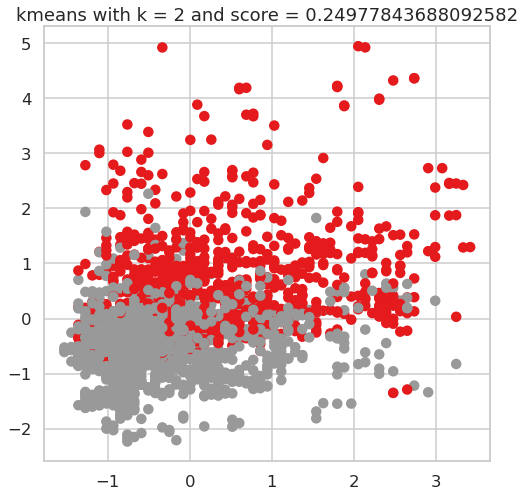

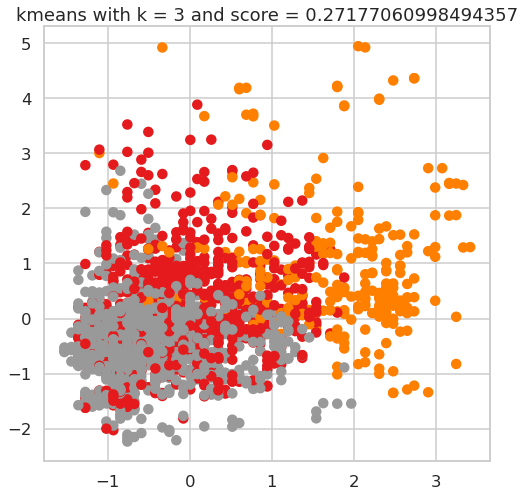

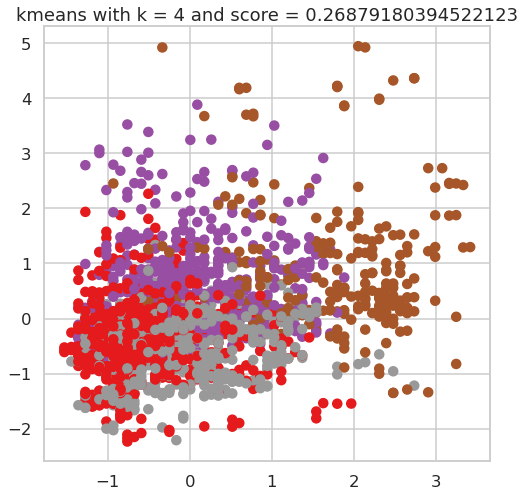

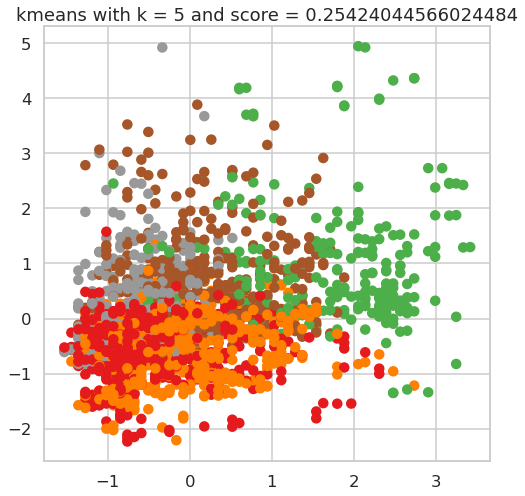

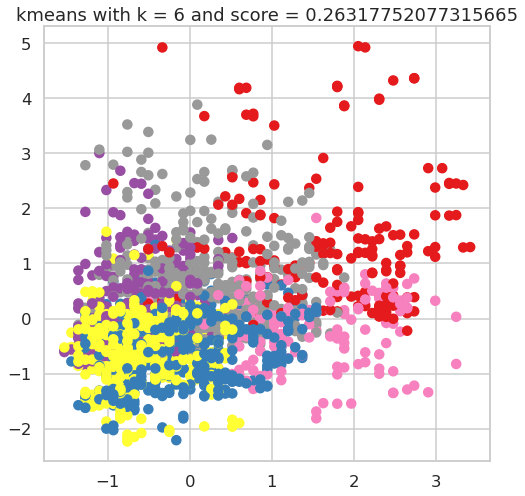

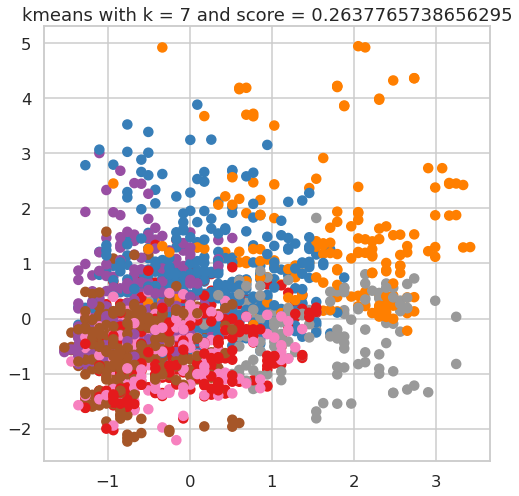

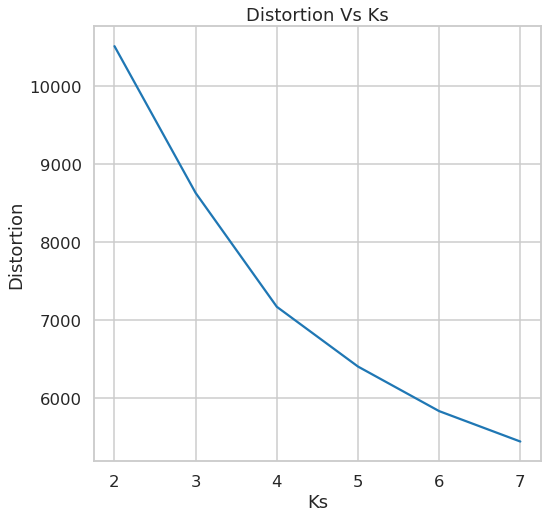

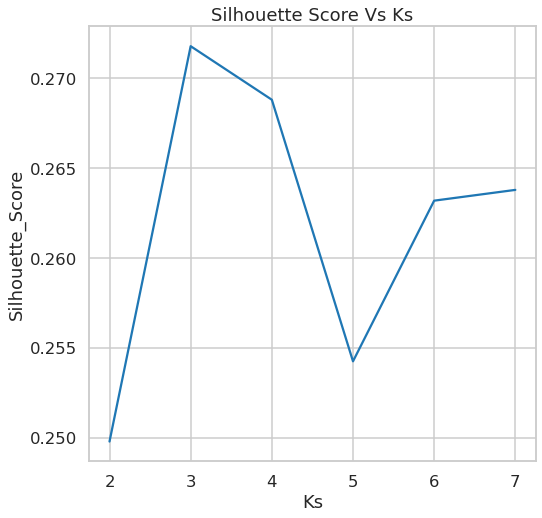

The best K value is 3


In [113]:
#after scalling 
#clustering cutomer data with kmeans
def plot_clusters(data,labels,title):
    plt.scatter(data[:,2],data[:,4],c=labels,cmap='Set1')
    plt.title(title)
    plt.show
k_range = list(range(2,8,1))
distortion = []
S_score = []
all_scores = []


for i in k_range:
    kmeans = KMeans(n_clusters=i).fit(scaled_data)
    distortion.append(kmeans.inertia_)
    score = silhouette_score(scaled_data,kmeans.labels_)
    S_score.append(score)
    title = f'kmeans with k = {i} and score = {score}'
    plot_clusters(scaled_data,kmeans.labels_,title)
    plt.show()
   
   
index_of_highest_score = np.array(S_score).argmax()   
best_k_kmeans = k_range[index_of_highest_score]
best_s_score_kmeans = S_score[index_of_highest_score] 
all_scores.append(best_s_score_kmeans)

plt.xlabel("Ks")
plt.ylabel("Distortion")
plt.title("Distortion Vs Ks")
plt.plot(k_range,distortion)  
plt.show()

plt.xlabel("Ks")
plt.ylabel("Silhouette_Score")
plt.title("Silhouette Score Vs Ks")
plt.plot(k_range,S_score)  
plt.show()

print(f"The best K value is {best_k_kmeans}")

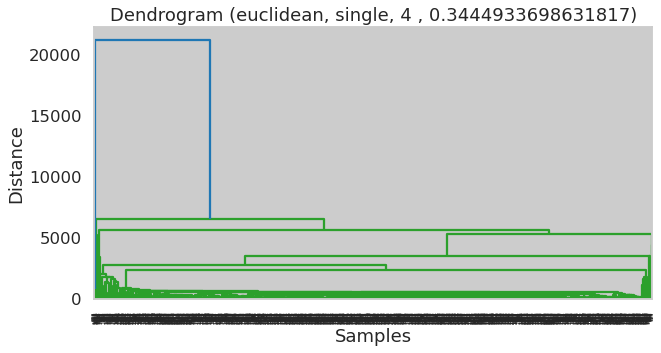

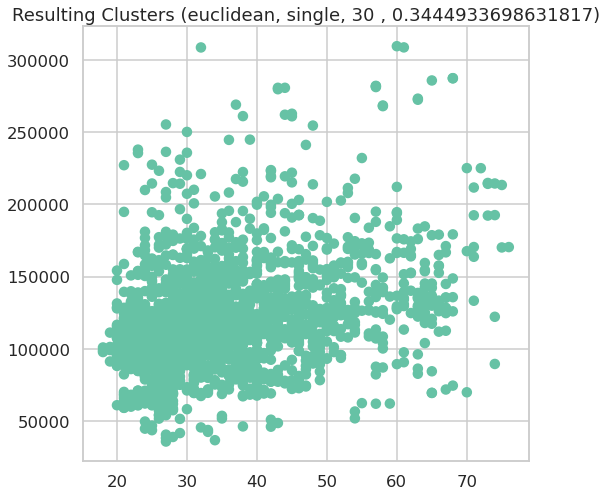

best params for agglomerative clustering are euclidean, single, 30 , 0.3444933698631817


In [109]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt



#heirarichal clustering for customer data
affinity = ["euclidean", "manhattan", "cosine"]
linkage_list = ["average", "single"]
distances = [0.1,0.2, 0.5,0.9, 1,2,5,7,13,15,16,30]


clusters = [2,3,4]
silhouette_scores = []
max_score = 0
best_affinity = ''
best_linkage = ''
best_threshold = ''
best_s_score_heirarical = 0

for i in range(len(affinity)):
    affnty = affinity[i]
    for j in range(len(linkage_list)):
        lnkage = linkage_list[j]

        for dist in distances:

            cluster_model = AgglomerativeClustering(n_clusters=None, affinity=affnty, linkage=lnkage,distance_threshold=dist).fit(customer_data)
            labels = cluster_model.labels_
            
            
            if(len(np.unique(cluster_model.labels_)) > 1 and len(np.unique(cluster_model.labels_)) < (len(customer_data)-1)):
                score = silhouette_score(customer_data, labels,metric=affnty)
                silhouette_scores.append(score)
                if(score > max_score):
                    max_score = score
                    best_affinity = affnty
                    best_linkage = lnkage
                    best_threshold = dist
                    best_s_score_heirarical = max_score
                    best_cluster_model = cluster_model

            else:
                score = -1
                silhouette_scores.append(score)
            
                          
if(best_affinity == "manhattan"):
    metric = "cityblock"
    linkage_matrix = linkage(customer_data, method=best_linkage, metric=metric)
else:
    linkage_matrix = linkage(customer_data, method=best_linkage, metric=best_affinity)    
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram ({best_affinity}, {best_linkage}, {cluster} , {best_s_score_heirarical})')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
            
plt.figure()
plt.title(f'Resulting Clusters ({best_affinity}, {best_linkage}, {best_threshold} , {best_s_score_heirarical})')
plt.scatter(customer_data[:,2], customer_data[:,4], c=cluster_model.labels_, cmap="Set2")
plt.show() 

best_params_agg = f"best params for agglomerative clustering are {best_affinity}, {best_linkage}, {best_threshold} , {best_s_score_heirarical}"    
print(best_params_agg)       

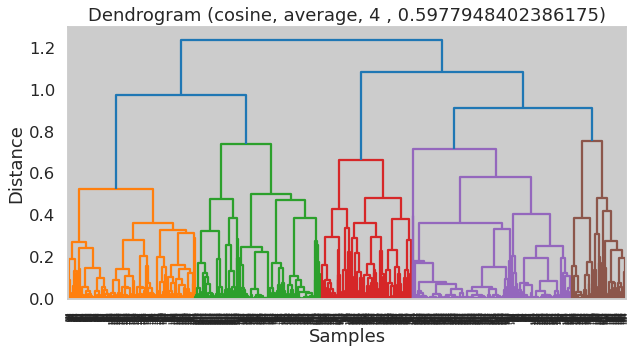

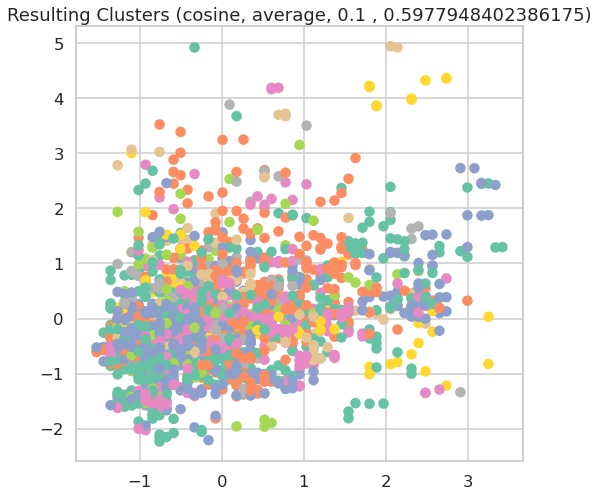

best params for agglomerative clustering are cosine, average, 0.1 , 0.5977948402386175


In [114]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt



#heirarichal clustering for customer data
affinity = ["euclidean", "manhattan", "cosine"]
linkage_list = ["average", "single"]
distances = [0.001,0.002,0.01,0.02,0.1,0.2, 0.5,0.9, 1,2,5,7,13,15,16,30]

data_scaled = StandardScaler().fit_transform(customer_df)

clusters = [2,3,4]
silhouette_scores = []
max_score = 0
best_affinity = ''
best_linkage = ''
best_threshold = ''
best_s_score_heirarical = 0

for i in range(len(affinity)):
    affnty = affinity[i]
    for j in range(len(linkage_list)):
        lnkage = linkage_list[j]

        for dist in distances:

            cluster_model = AgglomerativeClustering(n_clusters=None, affinity=affnty, linkage=lnkage,distance_threshold=dist).fit(scaled_data)
            labels = cluster_model.labels_
            
            
            if(len(np.unique(cluster_model.labels_)) > 1 and len(np.unique(cluster_model.labels_)) < (len(customer_data)-1)):
                score = silhouette_score(scaled_data, labels,metric=affnty)
                silhouette_scores.append(score)
                if(score > max_score):
                    max_score = score
                    best_affinity = affnty
                    best_linkage = lnkage
                    best_threshold = dist
                    best_s_score_heirarical = max_score
                    best_cluster_model = cluster_model

            else:
                score = -1
                silhouette_scores.append(score)
            
                          
if(best_affinity == "manhattan"):
    metric = "cityblock"
    linkage_matrix = linkage(scaled_data, method=best_linkage, metric=metric)
else:
    linkage_matrix = linkage(scaled_data, method=best_linkage, metric=best_affinity)    
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram ({best_affinity}, {best_linkage}, {cluster} , {best_s_score_heirarical})')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
            
plt.figure()
plt.title(f'Resulting Clusters ({best_affinity}, {best_linkage}, {best_threshold} , {best_s_score_heirarical})')
plt.scatter(scaled_data[:,2], scaled_data[:,4], c=best_cluster_model.labels_, cmap="Set2")
plt.show() 

best_params_agg = f"best params for agglomerative clustering are {best_affinity}, {best_linkage}, {best_threshold} , {best_s_score_heirarical}"    
print(best_params_agg) 

[0.5, 1.0, 1.5, 2.0, 2.5]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


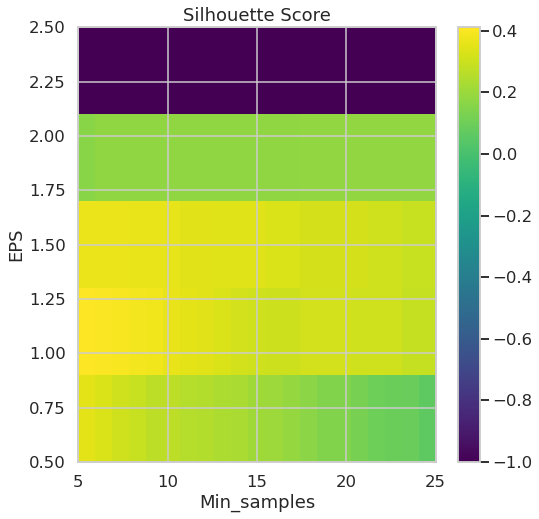

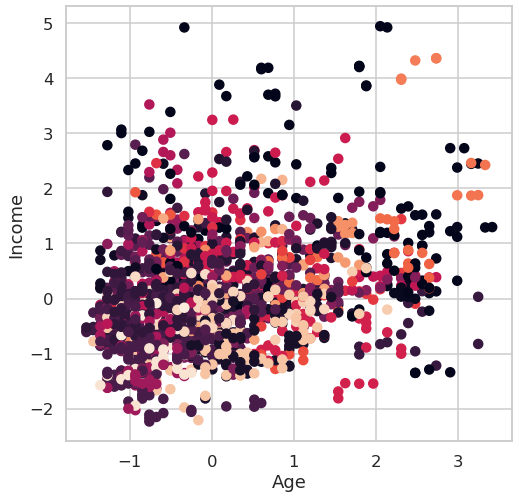

best params for DBSCAN are 1.0, 5, 0.41132269126085763


In [115]:
scaled_data = StandardScaler().fit_transform(customer_df)
scaled_data
#DBSCAN 
eps_list = [0.5, 1.0, 1.5, 2.0,2.5]
min_samples_list = list(range(5,26))
print(eps_list)
print(min_samples_list)
max_score = 0
silhouette_scores = np.zeros((len(eps_list), len(min_samples_list)))
i=0
j=0
for eps in eps_list:
    j=0
    for min_samples in min_samples_list:
        labels = DBSCAN(eps=eps,min_samples=min_samples).fit_predict(scaled_data)
        if(len(np.unique(labels)) > 1 and len(np.unique(labels))<(len(scaled_data)-1)):
            score = silhouette_score(scaled_data, labels)
            if(score > max_score):
                max_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels
                
        else:
            score = -1
        silhouette_scores[i,j] = score
        j+=1
    i+=1      

plt.imshow(silhouette_scores, cmap='viridis', origin='lower', extent=[min_samples_list[0], min_samples_list[-1], eps_list[0], eps_list[-1]], aspect='auto')
plt.colorbar()
plt.xlabel('Min_samples')
plt.ylabel('EPS')
plt.title('Silhouette Score')
plt.show()

plt.scatter(scaled_data[:,2],scaled_data[:,4],c=best_labels)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

best_params_DBSCAM = f"best params for DBSCAN are {best_eps}, {best_min_samples}, {max_score}"    
print(best_params_DBSCAM)    

In [94]:
len(np.unique(best_labels))

49

-15.607477918001424
-15.561048116090584
-15.554107664281402
-15.702258688681761
-15.694031693062012
-15.681543987946908
-15.636188298264486
-15.560502277481882
-15.570249771324924
-22.777534961551115
-22.092022877864242
-21.62512695070223
best loglikelood score -15.554107664281402
best covariance type full


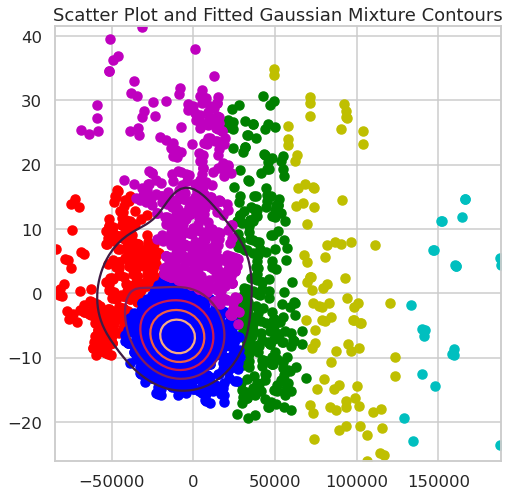

In [102]:
import math
from sklearn.decomposition import PCA

covariance_type_list = ['full', 'tied', 'diag', 'spherical']
n_components_list = list(range(2,8,2))

# apply PCA to reduce dimensionality to 2 features to be apple to draw the grid
pca = PCA(n_components=2)
data_pca = pca.fit_transform(customer_data)

max_score = -math.inf


for covariance_type in covariance_type_list:
    for n_components in n_components_list:
        gmm_model = GaussianMixture(n_components=n_components,covariance_type=covariance_type).fit(data_pca)
        score = gmm_model.score(data_pca)
        print(score)
        if(score>max_score):
            max_score = score
            best_cov_type = covariance_type
            best_gmm = gmm_model

print(f'best loglikelood score {max_score}')
print(f'best covariance type {best_cov_type}')    

y_labels = best_gmm.predict(data_pca)
# Create a grid of points to evaluate the PDF on
x_min, x_max = data_pca[:, 0].min() - 0.1, data_pca[:, 0].max() + 0.1
y_min, y_max = data_pca[:, 1].min() - 0.1, data_pca[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Evaluate PDF at grid points
pdf = best_gmm.score_samples(grid)
pdf = np.exp(pdf)
pdf = pdf.reshape(xx.shape)

# Plot scatter plot and fitted Gaussian Mixture contours
fig, ax = plt.subplots()
#ax.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=['r']*450+['b']*1000)
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i in range(n_bins):
    ax.scatter(data_pca[y_labels==i, 0], data_pca[y_labels==i, 1], c=colors[i], label=f'Model {i}')
    
ax.contour(xx, yy, pdf)
ax.set_title('Scatter Plot and Fitted Gaussian Mixture Contours')

plt.show()